### HR Analytics: Mengoptimalkan Sumber Daya Manusia melalui Data

Dalam dunia bisnis yang terus berubah, peran Sumber Daya Manusia (HR) telah berkembang menjadi lebih dari sekadar administrasi dan pengelolaan karyawan. Saat ini, HR memegang peranan strategis yang penting dalam pengambilan keputusan organisasi. Bagaimana HR dapat mengoptimalkan tenaga kerja, meningkatkan produktivitas, dan memastikan kepuasan karyawan? Jawabannya adalah dengan menerapkan HR Analytics.

HR Analytics adalah pendekatan yang memanfaatkan data dan analisis untuk memahami lebih dalam dinamika organisasi, karyawan, dan lingkungan kerja. Ini membantu HR dalam mengidentifikasi pola-pola yang mungkin terlewatkan, memprediksi kebutuhan sumber daya manusia di masa depan, dan mengukur dampak kebijakan dan program HR. Dengan HR Analytics, perusahaan dapat membuat keputusan yang lebih tepat dan terinformasi.

Dalam perjalanan ini, kita akan menjelajahi dunia HR Analytics, memahami bagaimana data dapat digunakan untuk meningkatkan pengelolaan sumber daya manusia, memaksimalkan produktivitas karyawan, dan mencapai tujuan organisasi. Kami akan melihat berbagai metode analisis, teknik visualisasi, dan praktik terbaik dalam HR Analytics untuk membantu Anda meraih keberhasilan dalam pengelolaan sumber daya manusia. Mari kita mulai perjalanan ini menuju pemahaman yang lebih dalam tentang dunia HR Analytics.

Berikut dibawah ini merupakan Exploratory Data Analysis dari kelompok kami Data Wizards mengenai HR Analytics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? </br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?</br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?</br>
(min/mean/median/max/unique/top/freq)

In [2]:
# Membaca masing masing data set serta menampilkan 5 sampling data dari setiap data set train dan test
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')
df_train.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
18897,31705,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Business Degree,15,NaN,NaN,>4,184,0.0
4782,32086,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,43,1.0
2319,13231,city_142,0.727,NaN,Has relevent experience,no_enrollment,Graduate,STEM,9,50-99,Pvt Ltd,4,254,0.0
11173,1609,city_76,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,3,32,0.0
16765,12323,city_101,0.558,Male,Has relevent experience,Part time course,Graduate,STEM,14,NaN,NaN,1,4,0.0


In [3]:
df_test.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
721,7315,city_26,0.698,Male,Has relevent experience,Full time course,Graduate,STEM,11,<10,NaN,2,37
576,15635,city_149,0.689,Male,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,1,122
91,1680,city_19,0.682,Male,Has relevent experience,no_enrollment,Masters,STEM,19,1000-4999,NaN,4,99
595,32584,city_142,0.727,NaN,Has relevent experience,no_enrollment,Masters,STEM,14,10/49,Pvt Ltd,4,48
1946,23734,city_162,0.767,Male,Has relevent experience,Full time course,Graduate,STEM,4,<10,Pvt Ltd,never,26


Data ini mencakup informasi terkait sumber daya manusia, dengan berbagai variabel seperti pengalaman, pendidikan, jenis kelamin, lokasi, dan lainnya. Terdapat beberapa nilai yang hilang dalam kolom-kolom seperti "gender" dan "company_size". Terdapat juga variasi dalam kolom "last_new_job" yang mencerminkan berapa lama seseorang telah mengganti pekerjaan terakhirnya. Data ini memiliki potensi besar untuk analisis HR yang mendalam. Dengan penerapan HR Analytics, perusahaan dapat memahami tren dalam perekrutan, retensi, dan pengembangan karyawan. Namun, sebelumnya, perlu melakukan pengelolaan data seperti mengisi nilai yang hilang dan memeriksa outlier.

In [4]:
# Informasi Data Frame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Jumlah Data: Data frame ini memiliki total <b>19,158 baris (entri) dan 14 kolom</b>.</br>

#### Kolom dengan Data Tipe Integer (int64):

enrollee_id: Kolom ID pendaftar.</br>
training_hours: Kolom jumlah jam pelatihan.</br>

#### Kolom dengan Data Tipe Float (float64):</br>

city_development_index: Indeks perkembangan kota.</br>
target: Kolom target, mungkin berhubungan dengan suatu prediksi atau klasifikasi.</br>

#### Kolom dengan Data Tipe Object (teks):</br>

city: Nama kota.</br>
gender: Jenis kelamin pendaftar.</br>
relevent_experience: Pengalaman yang relevan.</br>
enrolled_university: Universitas tempat pendaftar terdaftar.</br>
education_level: Tingkat pendidikan pendaftar.</br>
major_discipline: Disiplin ilmu utama pendaftar.</br>
experience: Pengalaman pendaftar.</br>
company_size: Ukuran perusahaan di mana pendaftar bekerja.</br>
company_type: Tipe perusahaan di mana pendaftar bekerja.</br>
last_new_job: Jumlah tahun sejak pekerjaan terakhir.</br>

#### Target Variable:
Kolom  target digunakan sebagai variabel target untuk tugas analisis atau pemodelan. Tipe data kolom ini adalah float64, yang menunjukkan kemungkinan ini adalah kolom target yang mengandung nilai numerik.

In [5]:
# Mengelompokkan kolom - kolom dari data frame
cats=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size',
      'company_type','last_new_job']
nums=['enrollee_id','city_development_index','training_hours','target']

In [6]:
#Statistik Deskriptif kolom numerikal
df_train[nums].describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Statistik deskriptif untuk kolom numerikal:</br>
1. Kolom 'enrollee_id' memiliki rentang ID pendaftar dari 1 hingga 33,380, dengan distribusi yang merata.</br>
2. Kolom 'city_development_index' memiliki rata-rata sekitar 0.829 dengan range yang wajar antara 0.448 hingga 0.949.</br>
3. Kolom 'training_hours' memiliki rata-rata sekitar 65.37 dengan range antara 1 hingga 336.</br>
4. Kolom 'target' adalah variabel biner, di mana sekitar 25% pendaftar memiliki nilai target 1.</br>

<b>Tidak ada data yang mencolok atau aneh dalam statistik ini.</b>

In [7]:
# Statistik deskriptif kolom kategorikal
df_train[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


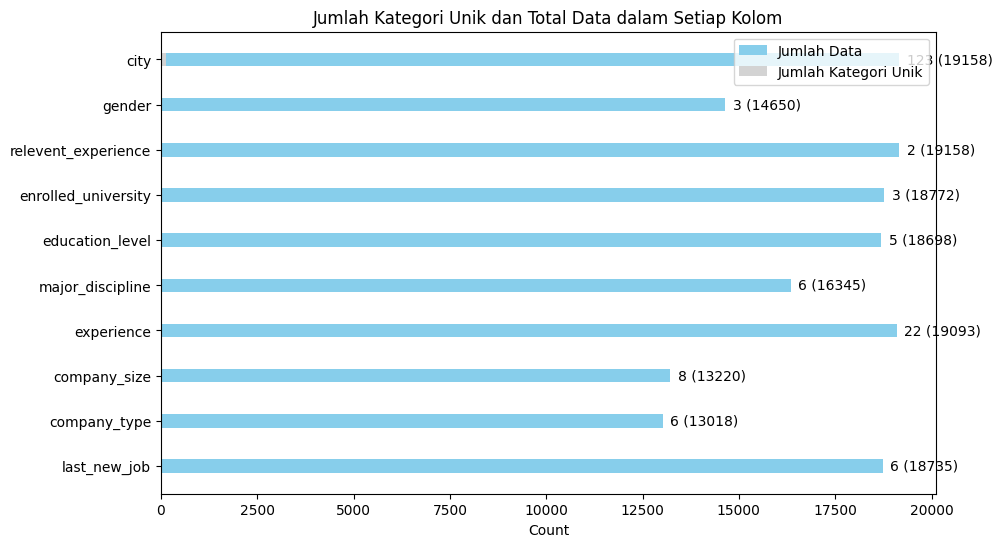

In [8]:
columns = ["city", "gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job"]
count = [19158, 14650, 19158, 18772, 18698, 16345, 19093, 13220, 13018, 18735]
unique_values = [123, 3, 2, 3, 5, 6, 22, 8, 6, 6]

plt.figure(figsize=(10, 6))
bar_width = 0.3 
index = range(len(columns))

plt.barh(index, count, bar_width, color='skyblue', label='Jumlah Data')
plt.barh(index, unique_values, bar_width, color='lightgrey', label='Jumlah Kategori Unik')

for i in index:
    plt.text(count[i] + 200, i, f'{unique_values[i]} ({count[i]})', va='center')

plt.xlabel('Count')
plt.title('Jumlah Kategori Unik dan Total Data dalam Setiap Kolom')
plt.yticks(index, columns)
plt.gca().invert_yaxis()
plt.legend()
plt.show()


Statistik deskriptif untuk kolom kategorikal:</br>

1. Kolom 'gender' memiliki data yang hilang dan berisi jenis kelamin paling umum adalah 'Male' dengan jenis kelamin Unik ada 3 dan Jumlah data 14.650.
2. Kolom 'enrolled_university' memiliki data yang hilang dan mayoritas tidak terdaftar di universitas jumlah Unik 3 dan Jumlah data 18.772.
3. Kolom 'education_level' memiliki data yang hilang dan mayoritas adalah lulusan Nilai Unik: 5 Jumlah Data: 18,698
4. Kolom 'major_discipline' memiliki beberapa nilai unik dan yang paling umum adalah 'STEM' Nilai Unik: 6 Jumlah Data: 16,345.
5. Kolom 'company_size' memiliki data yang hilang dan ukuran '50-99' adalah yang paling umum Nilai Unik: 8 Jumlah Data: 13,220
6. Kolom 'company_type' memiliki data yang hilang dan 'Pvt Ltd' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 13,018
7. Kolom 'last_new_job' memiliki data yang hilang dan '1' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 18,735

<b>!! Kolom gender memiliki 3 nilai unik (seharusnya terdapat 2 gender saja (Male dan Female))</b>

In [9]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df_train.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df_train.isna().sum()/len(df_train))

Missing Values
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Missing Values Percentage
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


#### Data yang Tidak Lengkap (NaN): 
Beberapa kolom seperti <b>gender, enrolled_university, education_level, major_discipline, experience, company_size, dan company_type </b> memiliki nilai yang hilang (NaN).

# 1. Descriptive Statistics (Kesimpulan)

A. Semua tipe data sudah sesuai </br>
B. Kolom <b> gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new job, dan training_hours</b> memiliki nilai kosong </br>
C. Kolom gender yang seharusnya memiliki 2 nilai unik ternyata memiliki 3 nilai unik.

# 2. Univariate Analysis

Gunakan <b>visualisasi</b> untuk melihat distribusi masing-masing kolom (feature maupun target).</br>
Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik</br> (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).</br> Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### Numerical Features

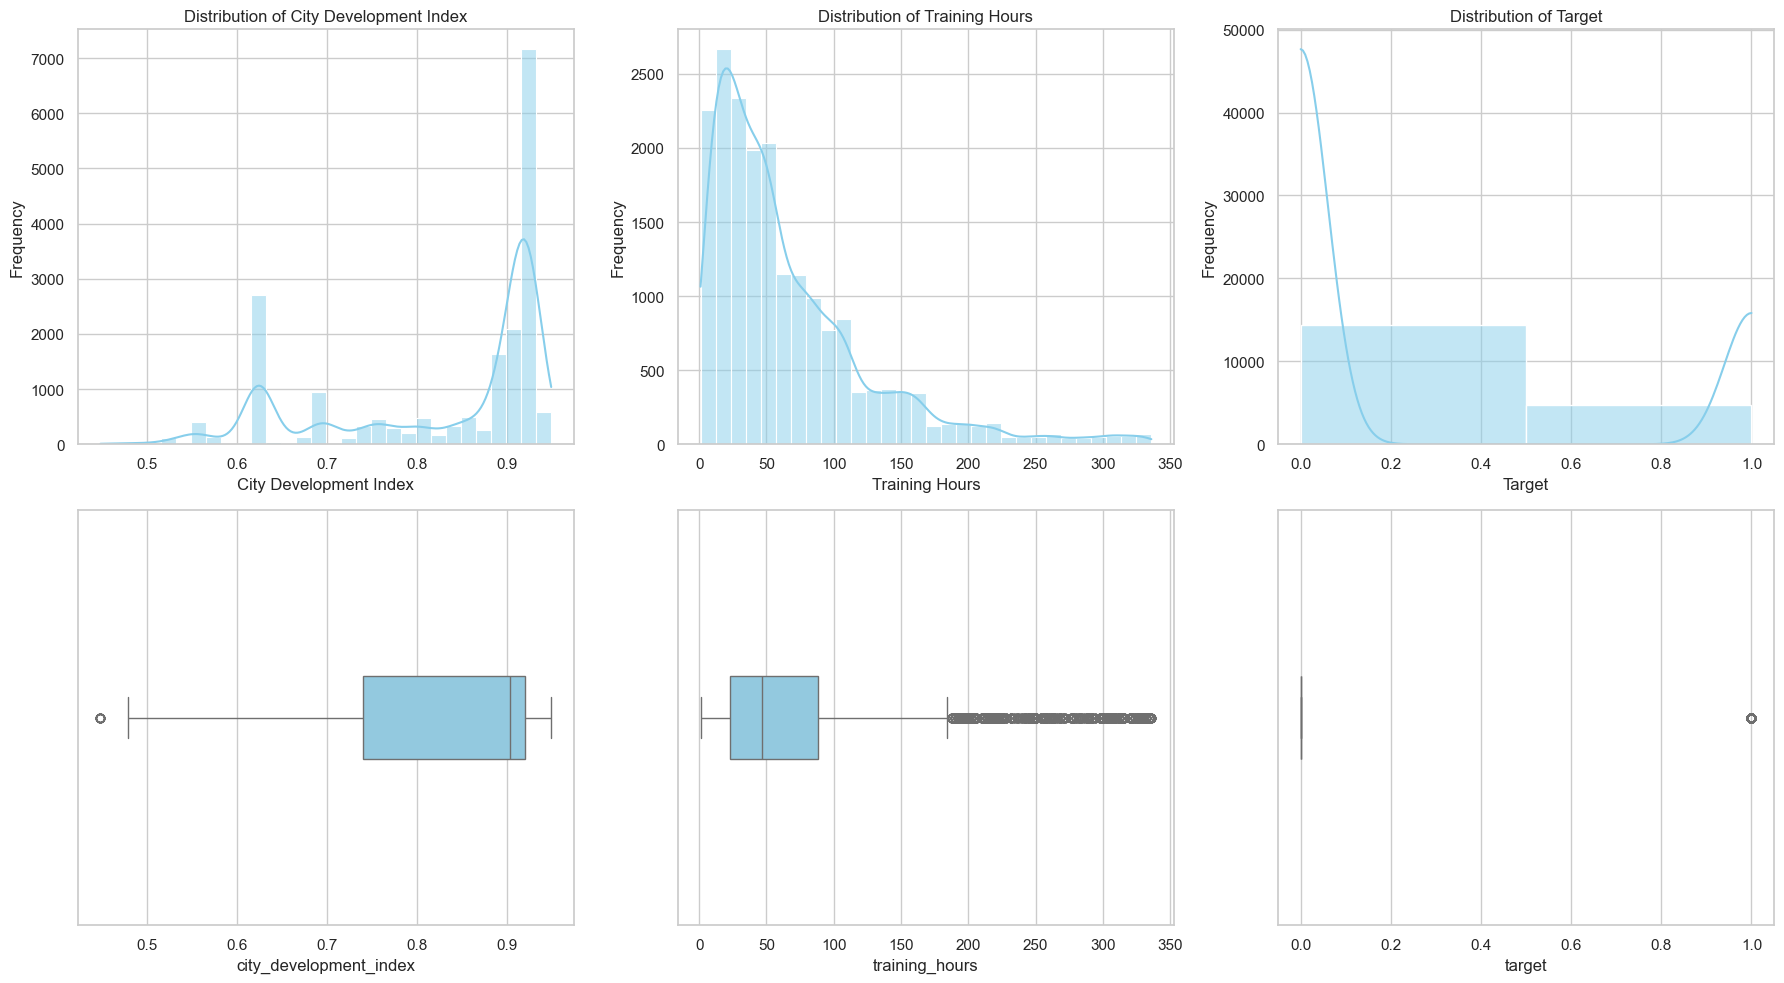

In [10]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.histplot(ax=axes[0, 0], x=df_train['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of City Development Index')
axes[0, 0].set_xlabel('City Development Index')
axes[0, 0].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 0], x=df_train['city_development_index'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 1], x=df_train['training_hours'], bins=30, kde=True, color='skyblue')
axes[0, 1].set_title('Distribution of Training Hours')
axes[0, 1].set_xlabel('Training Hours')
axes[0, 1].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 1], x=df_train['training_hours'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 2], x=df_train['target'], bins=2, kde=True, color='skyblue')
axes[0, 2].set_title('Distribution of Target')
axes[0, 2].set_xlabel('Target')
axes[0, 2].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 2], x=df_train['target'], color='skyblue', width=0.2)

plt.tight_layout()

plt.show()


#### Kesimpulan data numerikal

1. Distribution of City Development Index (Distribusi Indeks Pembangunan Kota):
CDI memiliki distribusi <b>bimodal</b> dengan dua puncak.</br>
Mayoritas data terkonsentrasi di sekitar nilai tengah indeks pembangunan kota.</br>
Terdapat beberapa nilai ekstrem yang diidentifikasi sebagai outlier dalam box plot.</br>
2. Distribution of Training Hours (Distribusi Jam Pelatihan):
Distribusi jam pelatihan <b>skew ke kanan</b> (positively skewed) dengan nilai<b> median yang lebih kecil daripada mean</b> (lihat df.describe pada no.1).
Mayoritas data berpusat di sekitar nilai rendah hingga menengah jam pelatihan.
Terdapat beberapa data yang diidentifikasi sebagai outlier dalam box plot, yang mengindikasikan jam pelatihan yang jauh lebih tinggi dari mayoritas.</br>
3. Distribution of Target (Distribusi Target):
Distribusi target menunjukkan bahwa mayoritas data adalah "non-seeking" (tidak mencari pekerjaan) dengan <b>persentase 3:1</b>.
Dengan kata lain, hanya 25% enrollee adalah pencari pekerjaan baru.

### Categorical Features

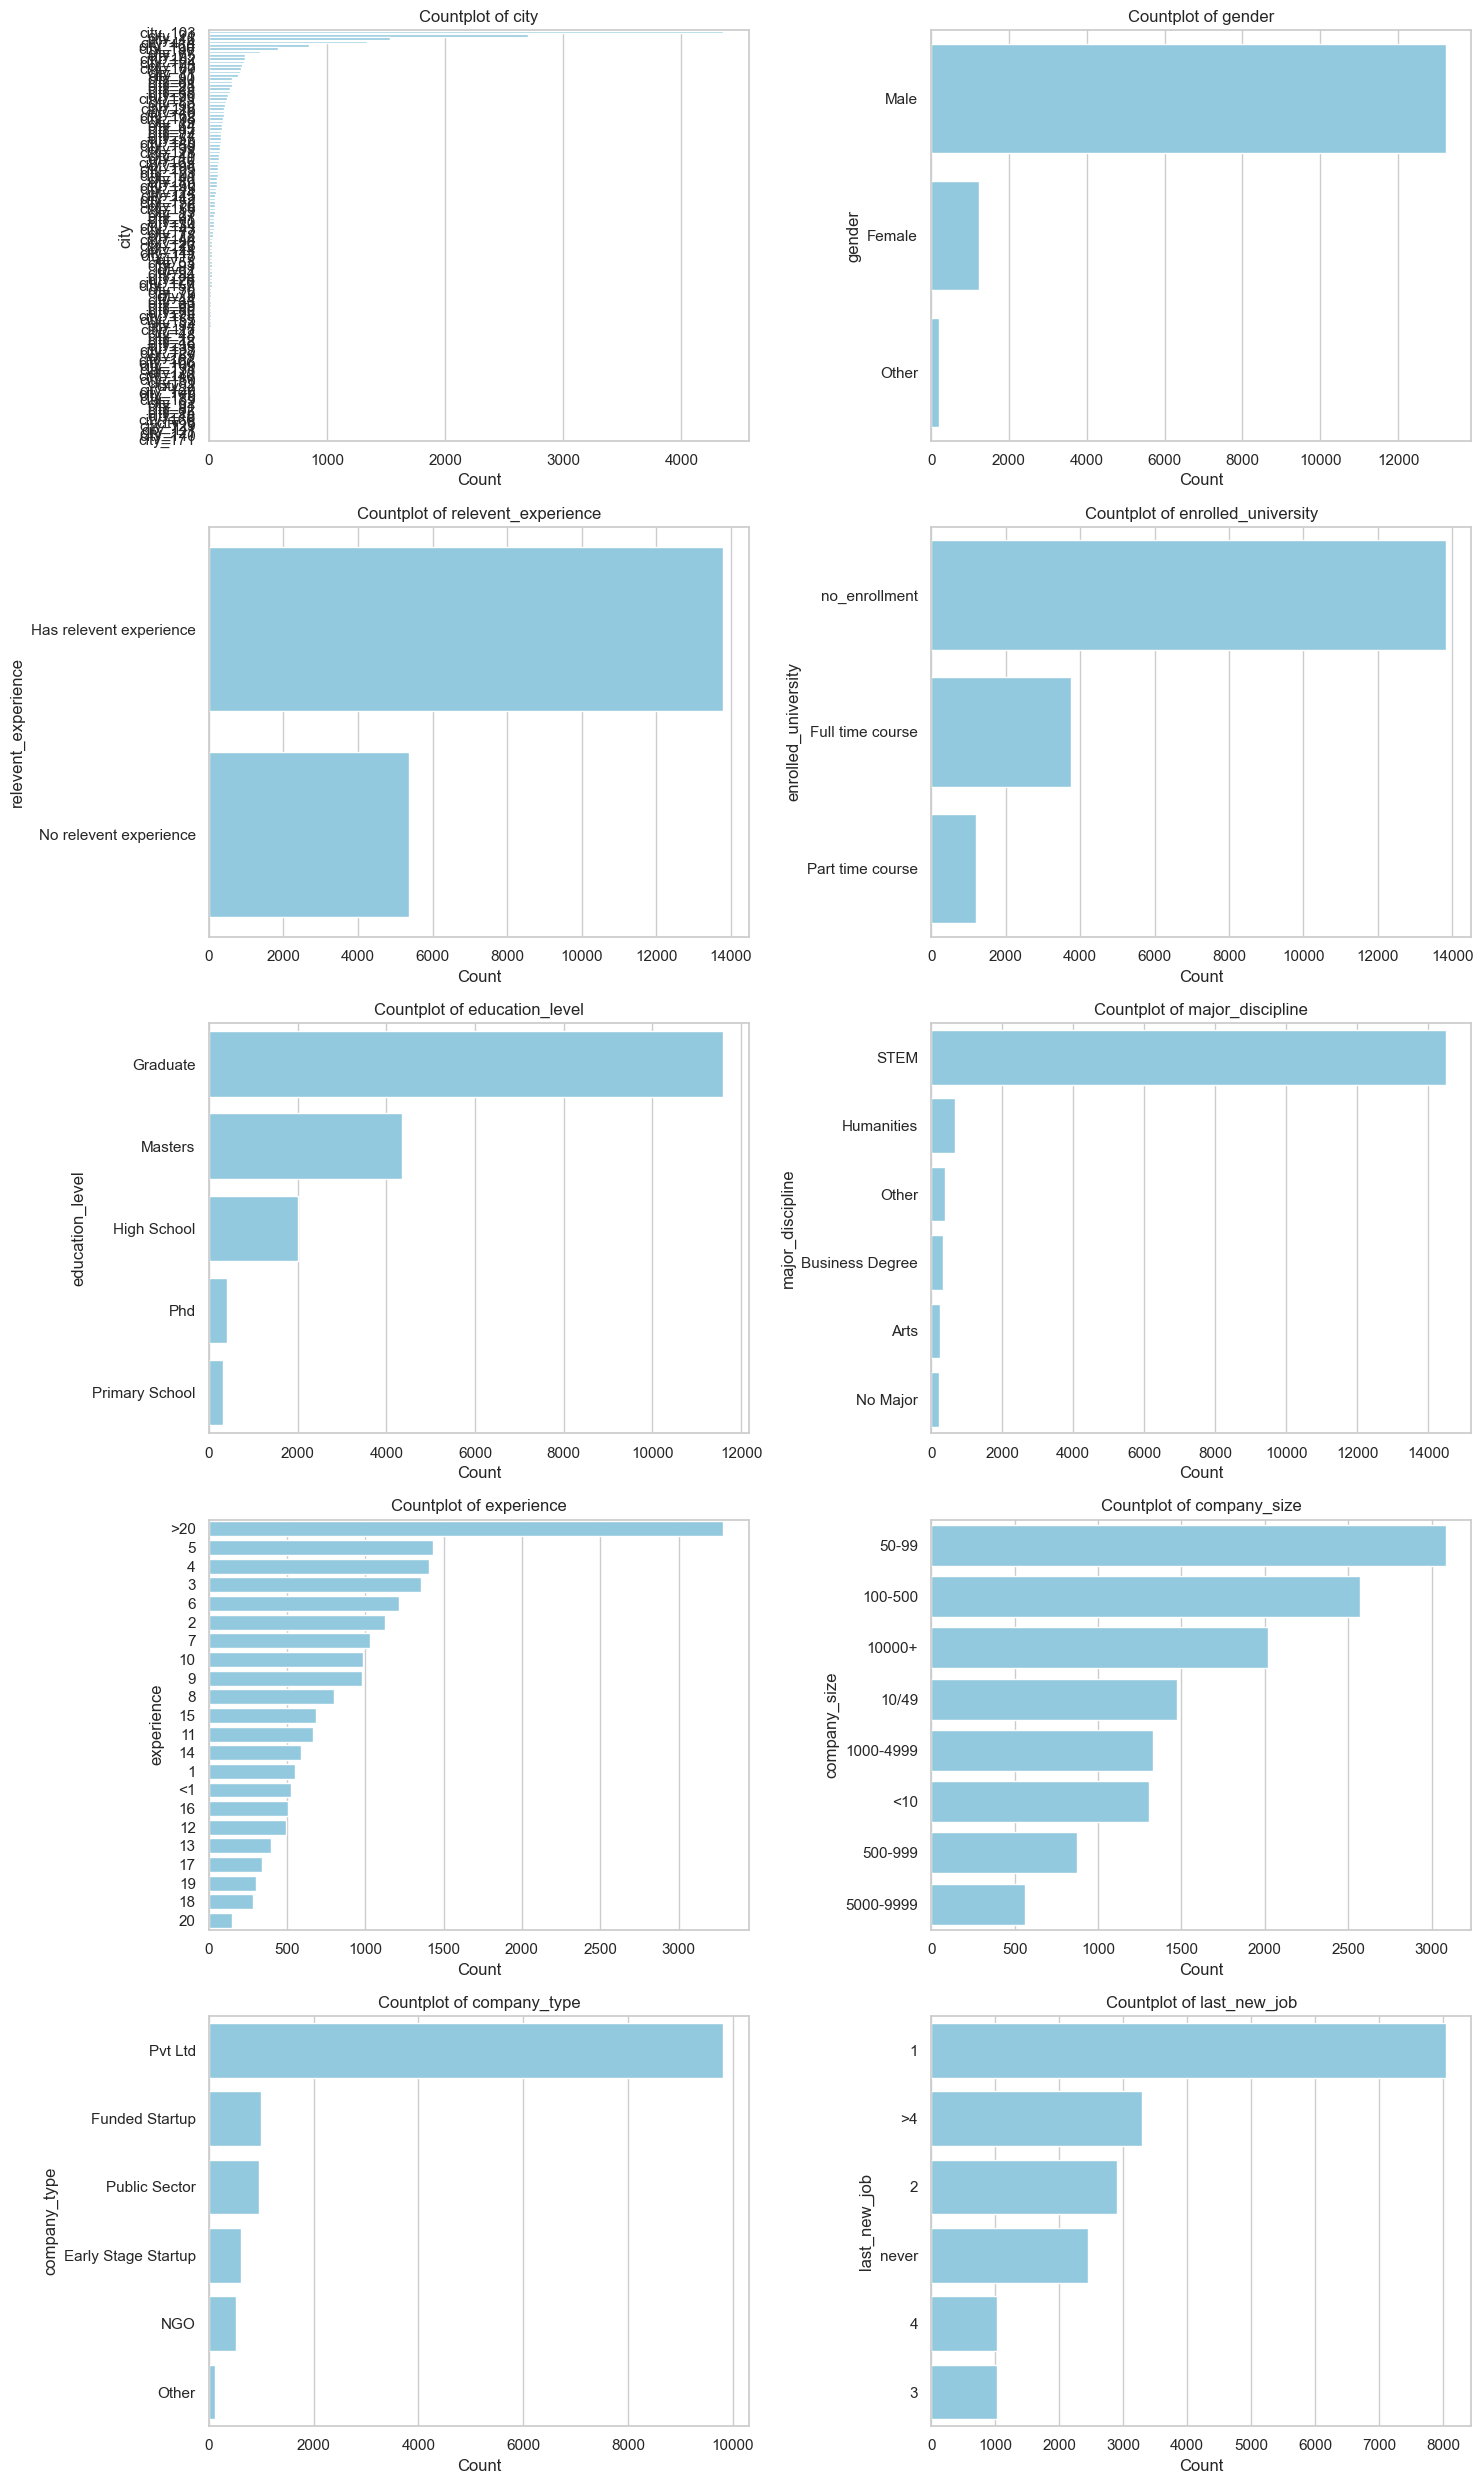

In [11]:
# Select the categorical features
categorical_features = ['city', 'gender', 'relevent_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience', 'company_size',
                        'company_type', 'last_new_job']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through categorical features and plot bar charts
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_train, y=feature, ax=axes[i], order=df_train[feature].value_counts().index, color='skyblue')
    axes[i].set_title(f'Countplot of {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Kesimpulan data kategorikal
city: Distribusi kota agak <b>tidak merata</b>, beberapa kota memiliki <b>frekuensi yang tinggi</b>.</br>
gender: Terdapat kategori <b>'Other'</b> yang mungkin perlu diperiksa lebih lanjut. Selain itu, <b>perbedaan frekuensi antara jenis kelamin cukup besar</b>.</br>
relevent_experience: <b>Mayoritas</b> kandidat<B> memiliki pengalaman relevan</b>.</br>
education_level: Kategori <b>'Primary School'</b> memiliki frekuensi yang <b>rendah</b> dibandingkan dengan kategori lainnya.</br>
major_discipline: Mayoritas kandidat memiliki disiplin mayor di bidang <b>Engineering</b>.</br>
experience: Distribusi pengalaman terlihat wajar, namun ada beberapa nilai yang mungkin perlu diinspeksi lebih lanjut.</br>
company_size: Kategori <b>'50-99' dan '100-500' memiliki frekuensi tertinggi</b>. Nilai 10/49 perlu diubah menjadi 10-49</br>
company_type: Mayoritas kandidat bekerja di perusahaan sektor <b>Private</b>.</br>
last_new_job: Mayoritas kandidat telah mengganti pekerjaan dalam waktu <b>kurang dari satu tahun</b>.</br>
target: <b>Distribusi target tidak seimbang</b>, dengan <b>mayoritas</b> kandidat <b>tidak mencari perubahan pekerjaan</b>.</br>

#### Follow-up <b>data preprocessing</b> yang dapat dilakukan meliputi:

Handling Missing Values: Perlu memeriksa dan mengatasi nilai yang hilang pada kolom dengan missing values seperti 'gender','enrolled_university', 'education_level', dsb.</br>
Outlier Detection and Handling: Memeriksa apakah ada outlier pada variabel numerik dan mengambil tindakan yang sesuai jika ada.</br>
Encoding Categorical Variables: Melakukan encoding pada variabel kategorikal untuk mengubahnya menjadi bentuk numerik yang dapat digunakan dalam pemodelan.</br>
Balancing Target: Mengambil tindakan untuk menangani ketidakseimbangan dalam target (oversampling, undersampling, atau metode lainnya).</br>
Feature Scaling: Melakukan normalisasi atau standardisasi pada variabel numerik jika dibutuhkan.</br>
Feature Engineering: Mungkin ada kemungkinan untuk menggabungkan, memisahkan, atau mengubah fitur untuk meningkatkan kinerja model.</br>
Validasi Data: Memastikan bahwa dataset telah divalidasi dengan benar untuk mengidentifikasi potensi masalah atau anomali lain yang perlu ditangani.

# 3. Multivariate Analysis + 4. Business Insight
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas).</br> Tuliskan hasil observasinya, seperti:</br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?</br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?</br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

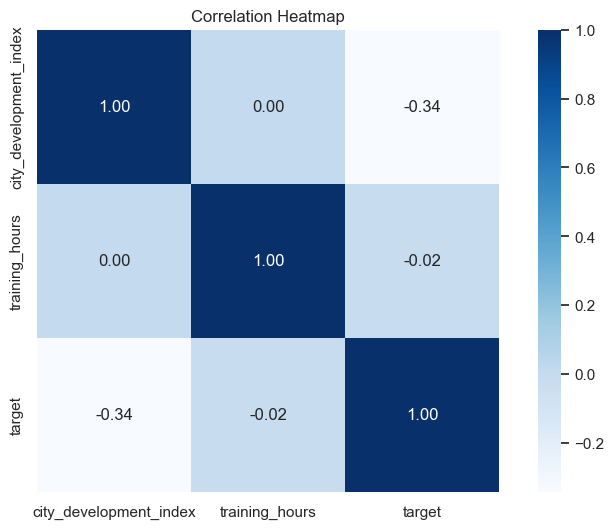

In [12]:
# Selecting the numerical features and target
numerical_features = ['city_development_index', 'training_hours', 'target']

# Subset the DataFrame with only the numerical features
numerical_df = df_train[numerical_features]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


Dari heatmap korelasi antara fitur-fitur numerik dan target ("city_development_index", "training_hours," dan "target"), kita dapat membuat beberapa kesimpulan:

1. City Development Index (CDI): Korelasi antara CDI dan target sangat rendah (0.04). Ini menunjukkan bahwa <b>CDI tidak memiliki pengaruh signifikan terhadap keputusan pencari kerja untuk mencari pekerjaan baru.</b>

2. Training Hours: Korelasi antara jumlah jam pelatihan ("training_hours") dan target juga rendah (-0.021). Ini menunjukkan bahwa <b>jumlah jam pelatihan yang diambil oleh pencari kerja juga tidak memiliki pengaruh signifikan terhadap keputusan mereka untuk mencari pekerjaan baru.</b>

Kesimpulannya, dari analisis korelasi, tidak ada fitur numerik yang memiliki korelasi yang kuat dengan kolom "target." Ini menunjukkan bahwa keputusan pencari kerja untuk mencari pekerjaan baru <b>kemungkinan besar dipengaruhi oleh faktor-faktor lain yang tidak tercakup dalam fitur-fitur numerik ini.</b> Oleh karena itu, penting untuk mempertimbangkan fitur-fitur lain atau faktor-faktor kualitatif dalam analisis yang mungkin lebih memengaruhi keputusan pencari kerja.

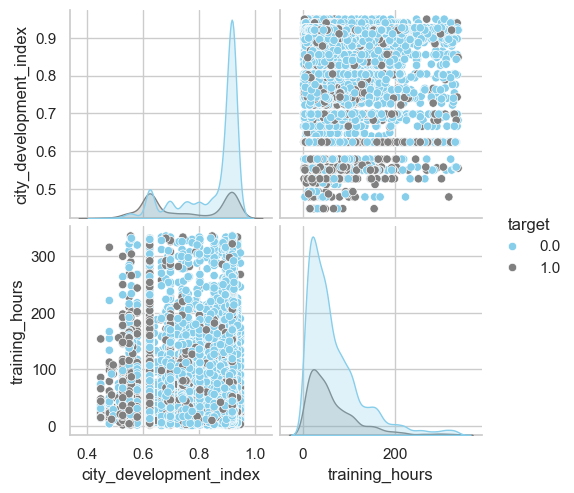

In [13]:
custom_palette = ["skyblue", "grey"]

# Define selected features for the pairplot
selected_features = ['city_development_index', 'training_hours', 'target']

# Create pairplot for selected features
sns.pairplot(df_train[selected_features], hue='target', palette=custom_palette, diag_kind='kde')
plt.show()

Pairplot ini memvisualisasikan hubungan antara variabel 'city_development_index' dan 'training_hours' dengan membedakan berdasarkan variabel target.
Seaborn pairplot digunakan untuk memahami sebaran data antara variabel 'city_development_index' dan 'training_hours' terhadap target (1 atau 0).
Tidak ada perbedaan signifikan dalam pola antara orang yang mencari pekerjaan baru (target 1) dan yang tidak (target 0) berdasarkan hubungan antara 'city_development_index' dan 'training_hours'. Ini terlihat dari sebaran titik-titik yang relatif seragam.

Hasil dari korelasi antara 'city_development_index' dan 'training_hours' terhadap target tidak ditampilkan dalam visualisasi. Namun, Anda dapat melihat korelasi ini di luar pairplot.
Nilai korelasi antara 'city_development_index' dan 'training_hours' dengan target akan memberikan informasi lebih lanjut tentang sejauh mana kedua fitur ini berhubungan dengan variabel target.
Kesimpulannya, pairplot mengungkapkan perbedaan yang signifikan dalam pola data antara variabel 'city_development_index' dan 'training_hours' dengan variabel target. 

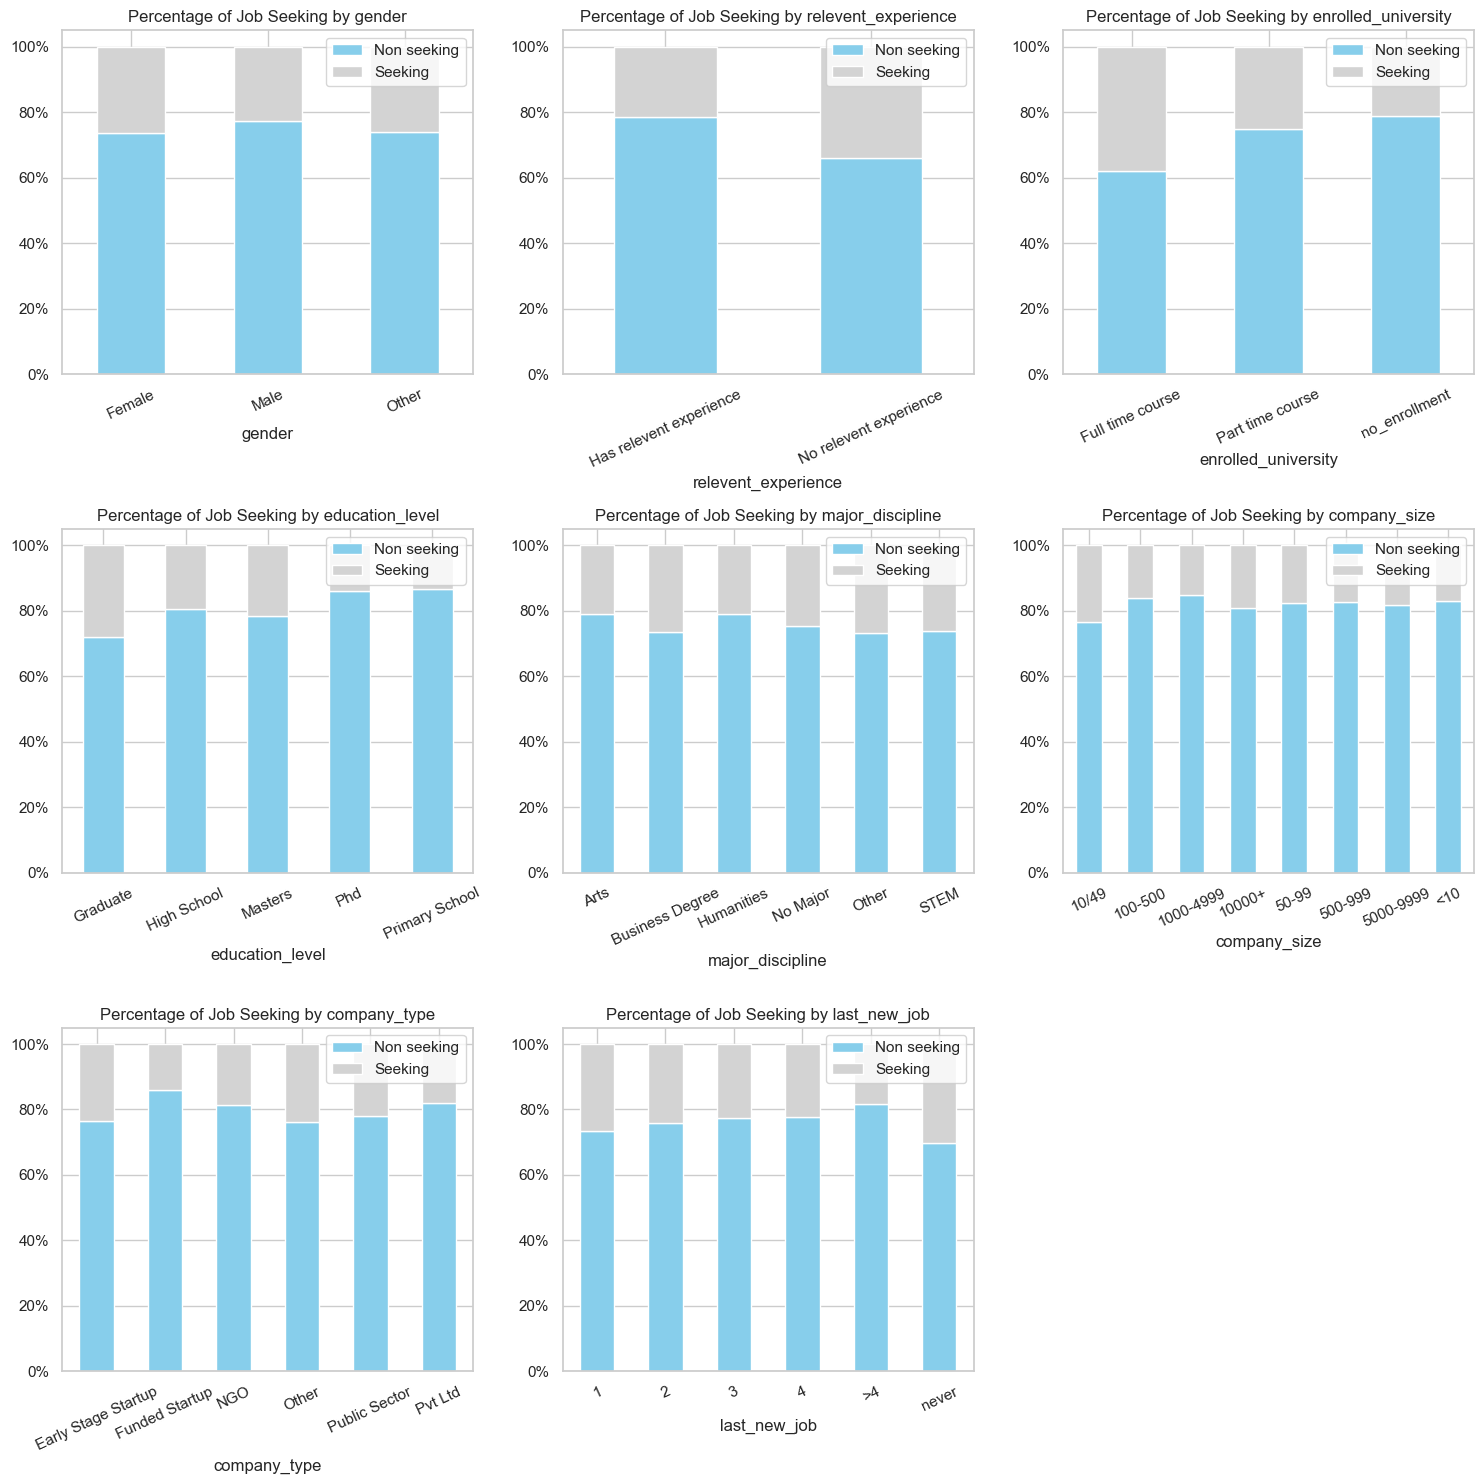

In [14]:
cats1 = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']

num_categories = len(cats1)
subplots_per_row = 3
num_rows = (num_categories + subplots_per_row - 1) // subplots_per_row

fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, num_rows * 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Define the colors for 'Non seeking' and 'Seeking'
colors = ['skyblue', 'lightgrey']

for i, cols in enumerate(cats1, 1):
    data = df_train.groupby([cols, 'target'])['target'].count().unstack().fillna(0)
    data_percentage = data.div(data.sum(axis=1), axis=0)

    row = (i - 1) // subplots_per_row
    col = (i - 1) % subplots_per_row

    ax = data_percentage.plot(kind='bar', stacked=True, color=colors, ax=axes[row, col])
    ax.set_title(f'Percentage of Job Seeking by {cols}')
    ax.legend(labels=('Non seeking', 'Seeking'))
    ax.set_xticklabels(data_percentage.index, rotation=25)
    ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])

for i in range(num_categories, num_rows * subplots_per_row):
    row = i // subplots_per_row
    col = i % subplots_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


Dari visualisasi yang disajikan, kita dapat menarik beberapa kesimpulan terkait dengan persentase pencari pekerjaan (seeking) berdasarkan berbagai kategori yang terdapat dalam dataset:

1. <b>Gender</b> (Jenis Kelamin):
Presentase "Seeking' pada gender Female lebih tinggi dibandingkan Male. Mayoritas data menunjukkan persentase "Non Seeking" yang lebih tinggi daripada "Seeking" di semua kelompok jenis kelamin.

2. <b>Relevant Experience </b>(Pengalaman Terkait):
Orang-orang dengan pengalaman terkait cenderung memiliki persentase "Non seeking" yang lebih tinggi dibandingkan dengan yang tidak memiliki pengalaman terkait.

3. <b>Enrolled University </b>(Status Pendaftaran Universitas):
Orang-orang yang terdaftar di universitas memiliki persentase "Seeking" yang lebih tinggi dibandingkan dengan mereka yang tidak terdaftar di universitas.
Mungkin ada korelasi antara tidak terdaftarnya di universitas dengan pencarian pekerjaan baru.

4. <b>Education Level</b> (Tingkat Pendidikan):
Tidak ada tren yang konsisten dalam persentase pencari pekerjaan berdasarkan tingkat pendidikan. Namun, individu dengan tingkat pendidikan "Graduate" cenderung memiliki persentase "Seeking" yang lebih tinggi.

5. <b>Major Discipline </b>(Disiplin Ilmu Utama):
Tidak ada perbedaan yang signifikan dalam persentase pencari pekerjaan berdasarkan disiplin ilmu utama.
Persentase "Non seeking" lebih dominan dalam semua disiplin ilmu utama.

6. <b>Company Size</b> (Ukuran Perusahaan):
Individu yang bekerja di perusahaan dengan ukuran 10-49 orang cenderung memiliki persentase "Seeking" yang lebih tinggi.
Perusahaan dengan ukuran 100-500 dan 1000-4999 memiliki persentase "Non seeking" yang lebih tinggi.

7. <b>Company Type</b> (Jenis Perusahaan):
Perusahaan berjenis 'Funded Startup' memiliki presentase 'Seeking' terkecil dibanding jenis perusahaan lainnya.

8. <b>Last New Job</b> (Pekerjaan Terakhir):
Orang-orang yang telah bekerja dalam pekerjaan sebelumnya selama 1 tahun memiliki persentase "Seeking" yang lebih tinggi.
Individu dengan pekerjaan terakhir selama 4-5 tahun cenderung memiliki persentase "Non seeking" yang lebih tinggi.

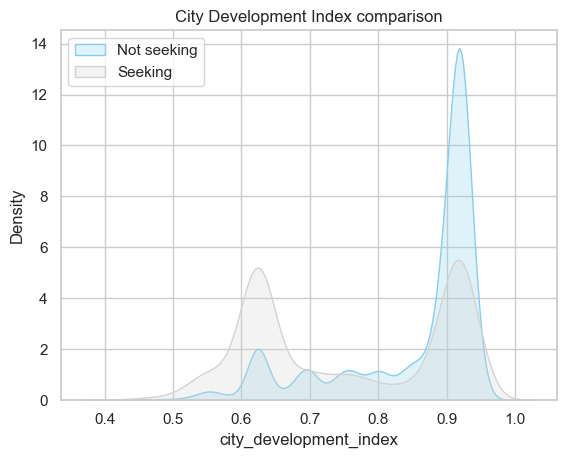

In [15]:
df0 = df_train[df_train['target']==0]
df1 = df_train[df_train['target']==1]

fig = sns.kdeplot(df0['city_development_index'] , fill=True, color="skyblue")
fig = sns.kdeplot(df1['city_development_index'], fill=True, color="lightgrey")
plt.title('City Development Index comparison')
plt.legend(labels=('Not seeking','Seeking'), loc='upper left')
plt.show()

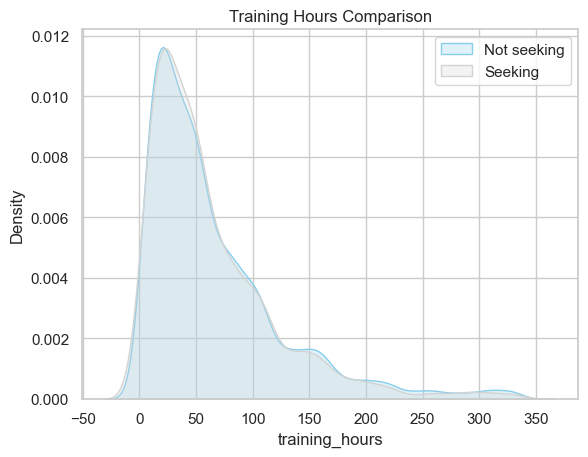

In [16]:
df0 = df_train[df_train['target']==0]
df1 = df_train[df_train['target']==1]

fig = sns.kdeplot(df0['training_hours'] , fill=True, color="skyblue")
fig = sns.kdeplot(df1['training_hours'], fill=True, color="lightgrey")
plt.title('Training Hours Comparison')
plt.legend(labels=('Not seeking','Seeking'), loc='upper right')
plt.show()

Dalam visualisasi "City Development Index comparison", terdapat dua distribusi yang dibandingkan, yaitu "Not seeking" (Tidak mencari pekerjaan) dan "Seeking" (Mencari pekerjaan) dengan menggunakan kernel density estimation (KDE). Berikut adalah kesimpulan dari grafik tersebut:

1. Warna biru mewakili mereka yang tidak mencari pekerjaan (Not seeking).
2. Warna abu-abu mewakili mereka yang sedang mencari pekerjaan (Seeking).
3. Perpotongan antara grafik seeking dan non seeking pada CDI 0.75 menunjukan <b>mayoritas pencari pekerjaan baru (seeking) bertempat pada kota dengan CDI yang rendah (<0.75)</b>. Para <b>non-pencari kerja</b> bertempat mayoritas pada kota dengan <b>CDI > 0.75</b>.

### Business Insight

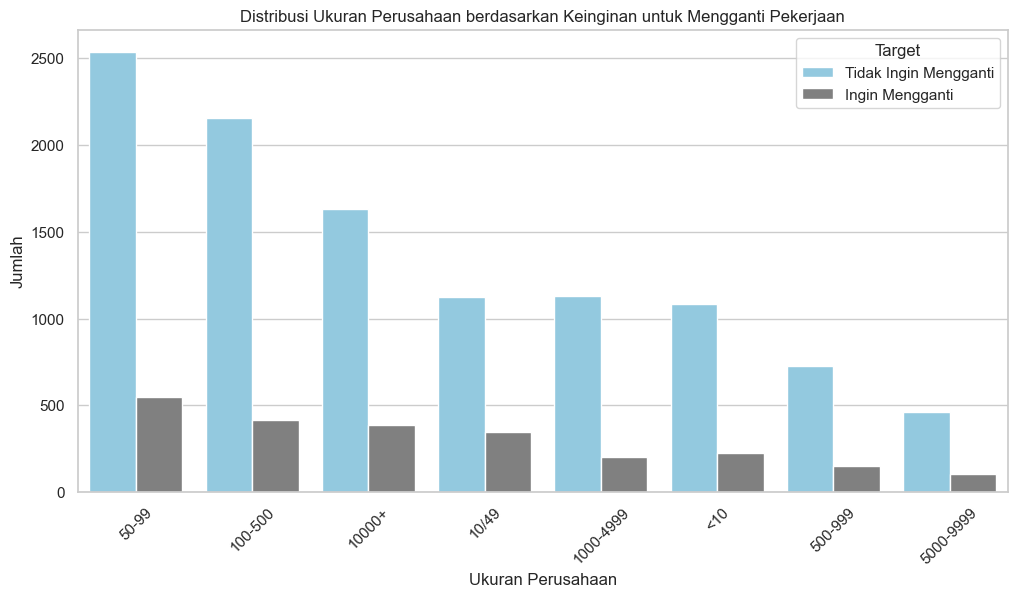

In [17]:
plt.figure(figsize=(12, 6))
custom_palette = ["skyblue", "grey"]
sns.countplot(data=df_train, x='company_size', hue='target', order=df_train['company_size'].value_counts().index, palette=custom_palette)
plt.title('Distribusi Ukuran Perusahaan berdasarkan Keinginan untuk Mengganti Pekerjaan')
plt.xlabel('Ukuran Perusahaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Tidak Ingin Mengganti', 'Ingin Mengganti'])
plt.show()

<Figure size 1200x600 with 0 Axes>

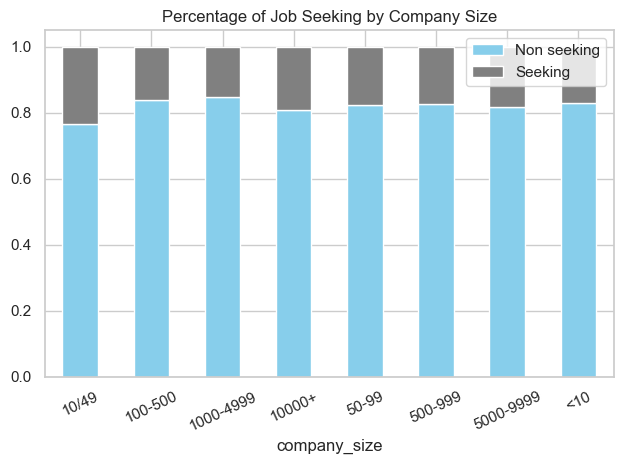

In [18]:
plt.figure(figsize=(12,6))
df_train.groupby('company_size')['target'].value_counts(normalize=True).unstack('target').plot.bar(stacked=True, color=custom_palette)
plt.title(f'Percentage of Job Seeking by Company Size')
plt.legend(labels=('Non seeking', 'Seeking'))
plt.xticks(rotation = 25)
    
plt.tight_layout()
plt.show()

Dalam plot distribusi ukuran perusahaan berdasarkan keinginan untuk mengganti pekerjaan, kami menggunakan warna "skyblue" untuk merepresentasikan kategori "Tidak Ingin Mengganti" dan warna "grey" untuk merepresentasikan kategori "Ingin Mengganti". Beberapa kesimpulan dari plot ini adalah:

1. Walaupun secara jumlah, perusahaan berukuran "50-99" dan "100-500" menjadi perusahaan dengan jumlah sampel enrollee terbanyak, namun secara presentase, kedua perusahaan tersebut memiliki jumlah "Seeker" yang masih di bawah 20%.

2. Begitupun dengan ukuran perusahaan "500-999" dan "5000-9999", dengan jumlah sampel yang sedikit, kedua perusahaan tersebut-pun masih memiliki presentase "Seeker" di bawah 20%.

3. Sebaliknya, satu-satunya perusahaan yang memiliki presentase pencari pekerjaan lebih dari 20% adalah yang berukuran "10-49".

Insight Bisnis :

1. Penyelidikan Lanjutan: Meskipun tidak ada ukuran perusahaan yang secara signifikan mendominasi, perusahaan berukuran "50-99" tampaknya menarik bagi karyawan baik yang ingin mengganti pekerjaan maupun yang tidak. Bisnis dapat melakukan penyelidikan lebih lanjut untuk memahami faktor-faktor yang membuat ukuran perusahaan ini menarik.

2. Perbedaan Preferensi: Distribusi ukuran perusahaan yang bervariasi menunjukkan bahwa preferensi karyawan dalam hal ukuran perusahaan dapat sangat beragam. Ini menyoroti pentingnya beragam dalam strategi rekrutmen dan retensi karyawan.

3. Strategi HR: Analisis ini dapat membantu departemen sumber daya manusia (HR) dalam merancang strategi untuk menjaga karyawan yang sudah ada dan merekrut karyawan baru. Misalnya, perusahaan dengan ukuran "50-99" dapat menjadi fokus bagi upaya rekrutmen.

4. Pemahaman Pasar Tenaga Kerja: Mengetahui preferensi karyawan terkait ukuran perusahaan dapat membantu bisnis dalam memahami pasar tenaga kerja dan merespons perubahan dalam preferensi karyawan.

5. Bisa dipertimbangkan mengingat perusahaaan di kota dengan CDI >0.75 memiliki retention rate yang lebih tinggi untuk berfokus pada penempatan perusahaan baru di kota-kota dengan CDI yang lebih tinggi.

6. Perlu penyelidikan lebih lanjut khusus untuk perusahaan berukuran <b> 10-49</b> untuk mengetahui penyebab tingginya presentase enrollee yang mencari pekerjaan baru.

7. Pentingnya 'relevant experience': Karyawan yang memiliki pengalaman terkait dapat lebih diprioritaskan untuk training mengingat rate of retention mereka yang lebih tinggi.

8. Rate of retention <b>'Graduate'</b> yang hanya sekitar 70% dapat diteliti lebih lanjut, apakah faktor kausalnya. 

# Data Cleansing

## Handle Missing Value

In [19]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df_train.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df_train.isna().sum()/len(df_train))

Missing Values
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Missing Values Percentage
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


In [20]:
# Fill missing value in other columns with mode
for column in columns:
    if df_train[column].isnull().sum()>0:
        df_train[column].replace(np.nan,df_train[column].mode()[0],inplace=True)

In [21]:
print("Missing Values")
print(df_train.isnull().sum())

Missing Values
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


## Handle Duplicate Data

In [22]:
df_train.duplicated().sum()

0

## Handle Outlier

In [23]:
#4. Filtering Outliers using Z-score
# Penjelasan: Filtering hanya dilakukan pada kolom 'city_development_index','training_hours'
# Kolom-kolom ini diharapkan menjadi fitur yang akan digunakan pada pemodelan dan dapat memprediksi 

from scipy import stats

In [24]:

print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))

for col in ['city_development_index','training_hours']:
    zscore = abs(stats.zscore(df_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df_train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')


Jumlah baris sebelum memfilter outlier: 19158
Jumlah baris setelah memfilter outlier: 18691


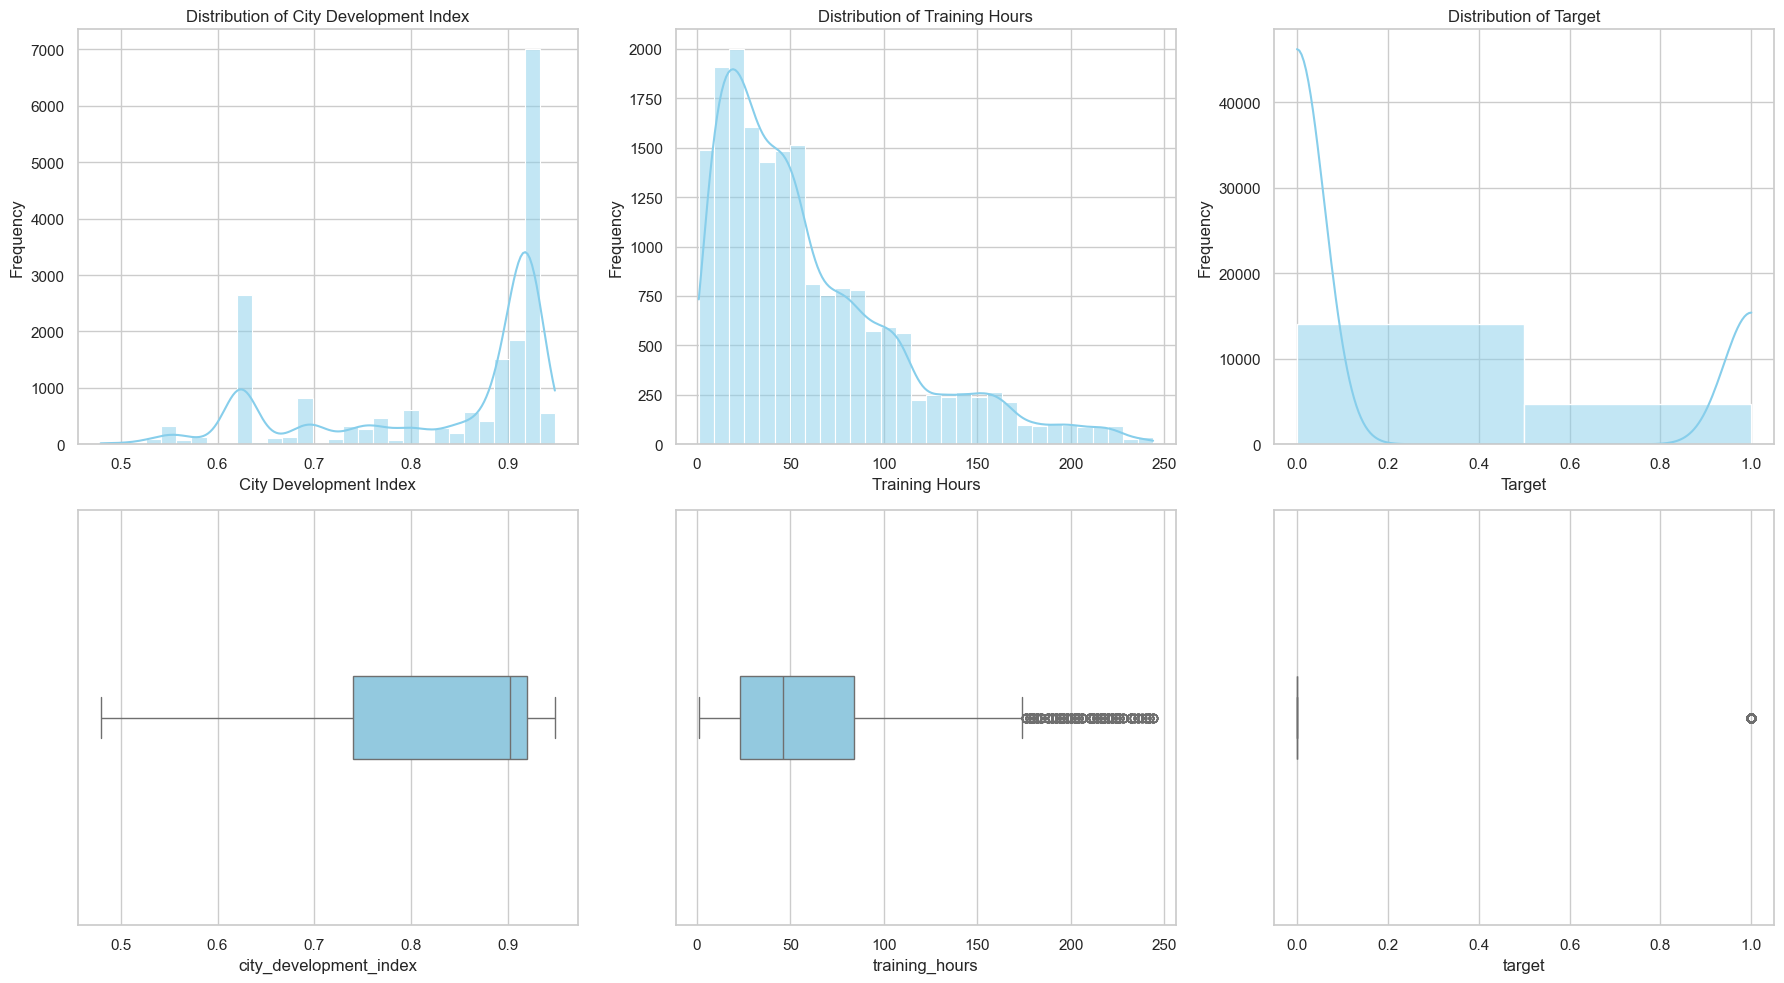

In [25]:
#Distribusi data berdasarkan numerical setelah droping rows
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.histplot(ax=axes[0, 0], x=df['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of City Development Index')
axes[0, 0].set_xlabel('City Development Index')
axes[0, 0].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 0], x=df['city_development_index'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 1], x=df['training_hours'], bins=30, kde=True, color='skyblue')
axes[0, 1].set_title('Distribution of Training Hours')
axes[0, 1].set_xlabel('Training Hours')
axes[0, 1].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 1], x=df['training_hours'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 2], x=df['target'], bins=2, kde=True, color='skyblue')
axes[0, 2].set_title('Distribution of Target')
axes[0, 2].set_xlabel('Target')
axes[0, 2].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 2], x=df['target'], color='skyblue', width=0.2)

plt.tight_layout()

plt.show()

## Feature Transformation

In [26]:
# Transformasi fitur2 (normalisasi, standardisasi dan np log)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['cdi_log']= np.log(df['city_development_index'])
df['th_log']= np.log(df['training_hours'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18691 entries, 0 to 19157
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18691 non-null  int64  
 1   city                    18691 non-null  object 
 2   city_development_index  18691 non-null  float64
 3   gender                  18691 non-null  object 
 4   relevent_experience     18691 non-null  object 
 5   enrolled_university     18691 non-null  object 
 6   education_level         18691 non-null  object 
 7   major_discipline        18691 non-null  object 
 8   experience              18691 non-null  object 
 9   company_size            18691 non-null  object 
 10  company_type            18691 non-null  object 
 11  last_new_job            18691 non-null  object 
 12  training_hours          18691 non-null  int64  
 13  target                  18691 non-null  float64
 14  cdi_log                 18691 non-null

<Figure size 640x480 with 0 Axes>

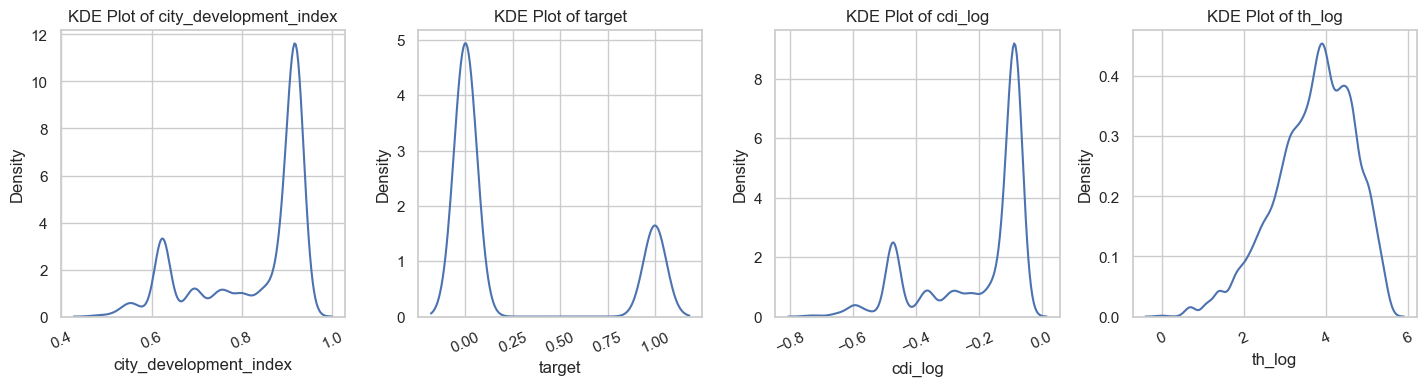

In [28]:
#Melihat distribusi setelah transformasi fitur

new_nums_df = df.select_dtypes(include='float64')
new_nums = new_nums_df.columns


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.figure( figsize=(18, 18))
for i, cols in enumerate(new_nums, 0):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(data=df, x=cols)
    plt.title(f'KDE Plot of {cols}')
    plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

# Correlation Numerical Feature

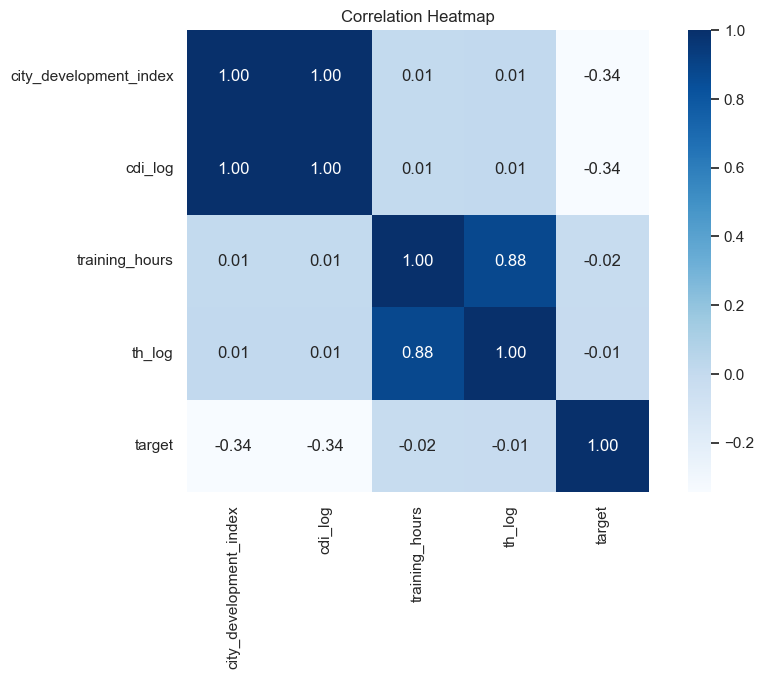

In [29]:
# Selecting the numerical features and target
num_features = ['city_development_index', 'cdi_log', 'training_hours', 'th_log', 'target']

# Subset the DataFrame with only the numerical features
num_df = df[num_features]

# Calculate the correlation matrix
corr_matrix = num_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
correlation = df.corr()["target"]
correlation_sorted = correlation.sort_index()

print(correlation_sorted)

cdi_log                  -0.344582
city_development_index   -0.340224
enrollee_id               0.049739
target                    1.000000
th_log                   -0.008731
training_hours           -0.016336
Name: target, dtype: float64


In [31]:
column_to_drop = ['enrollee_id', 'city_development_index', 'th_log']
df.head() 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,cdi_log,th_log
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0,-0.083382,3.583519
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,-0.253603,3.850148
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0,-0.471605,4.418841
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0,-0.236989,3.951244
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,-0.265268,2.079442


# Chi-Square

In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select the categorical columns and the target variable
categorical_columns = [
    'city', 'gender', 'relevent_experience', 'enrolled_university',
    'education_level', 'major_discipline', 'experience',
    'company_size','company_type', 'last_new_job'
]
target_variable = 'target'

# Create a contingency table for each combination of categorical variable and the target variable
chi_square_results = {}

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[column] = {'chi2': chi2, 'p-value': p}

# Display the results
for column, result in chi_square_results.items():
    print(f"Chi-square test for {column} vs {target_variable}:")
    print(f"Chi-square value: {result['chi2']}")
    print(f"P-value: {result['p-value']}")
    print('-' * 30)

Chi-square test for city vs target:
Chi-square value: 2907.6673376652707
P-value: 0.0
------------------------------
Chi-square test for gender vs target:
Chi-square value: 2.0191120826384124
P-value: 0.36438071364818125
------------------------------
Chi-square test for relevent_experience vs target:
Chi-square value: 304.43180750156364
P-value: 3.5665880252124565e-68
------------------------------
Chi-square test for enrolled_university vs target:
Chi-square value: 431.92540324049327
P-value: 1.6165546434897008e-94
------------------------------
Chi-square test for education_level vs target:
Chi-square value: 157.04584879738215
P-value: 6.286654212068171e-33
------------------------------
Chi-square test for major_discipline vs target:
Chi-square value: 8.303753826391528
P-value: 0.14027064697753944
------------------------------
Chi-square test for experience vs target:
Chi-square value: 660.5076676381736
P-value: 2.883610843335184e-126
------------------------------
Chi-square test

In [33]:
column_to_drop = column_to_drop + ['gender', 'major_discipline']
df.head() 

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,cdi_log,th_log
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0,-0.083382,3.583519
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,-0.253603,3.850148
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0,-0.471605,4.418841
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0,-0.236989,3.951244
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,-0.265268,2.079442


## Feature Engineering and encoding (ordinal)

In [34]:
# city
df['city']= df['city'].str.replace('city_', '')
df['city'] = df['city'].astype(int, errors = 'raise')

In [35]:
# relevent experince
df['relevent_experience']= df['relevent_experience'].str.replace('No relevent experience', '0')
df['relevent_experience']= df['relevent_experience'].str.replace('Has relevent experience', '1')
df['relevent_experience'] = df['relevent_experience'].astype(int, errors = 'raise')

In [36]:
# Enrolled University
df['enrolled_university']= df['enrolled_university'].str.replace('no_enrollment', '0')
df['enrolled_university']= df['enrolled_university'].str.replace('Part time course', '1')
df['enrolled_university']= df['enrolled_university'].str.replace('Full time course', '2')
df['enrolled_university'] = df['enrolled_university'].astype(int, errors = 'raise')

In [37]:
# Education Level
df['education_level']= df['education_level'].str.replace('Primary School', '0')
df['education_level']= df['education_level'].str.replace('High School', '1')
df['education_level']= df['education_level'].str.replace('Graduate', '2')
df['education_level']= df['education_level'].str.replace('Masters', '3')
df['education_level']= df['education_level'].str.replace('Phd', '4')
df['education_level'] = df['education_level'].astype(int, errors = 'raise')

In [38]:
# Experience
df['experience']= df['experience'].str.replace('<1', '0')
df['experience']= df['experience'].str.replace('>20', '21')

for i in range(1,21):
    df['experience']=df['experience'].str.replace(str(i),str(i))
    
df['experience'] = df['experience'].astype(int, errors = 'raise')

In [39]:
# Company Size
# Mengganti tanda "/" dengan tanda "-"
# Mengganti "100-500" menjadi "100-499"

df['company_size'] = df['company_size'].str.replace('/', '-')
df['company_size'] = df['company_size'].str.replace('100-500', '100-499')


df['company_size']= df['company_size'].str.replace('<10', '0')
df['company_size']= df['company_size'].str.replace('10-49', '1')
df['company_size']= df['company_size'].str.replace('50-99', '2')
df['company_size']= df['company_size'].str.replace('100-499', '3')
df['company_size']= df['company_size'].str.replace('500-999', '4')
df['company_size']= df['company_size'].str.replace('1000-4999', '5')
df['company_size']= df['company_size'].str.replace('5000-9999', '6')
df['company_size']= df['company_size'].str.replace('10000+', '7')

df['company_size']= df['company_size'].str.replace('+', '')
df['company_size'] = df['company_size'].astype(int, errors = 'raise')

In [40]:
# last_new_job
df['last_new_job']= df['last_new_job'].str.replace('never', '0')
df['last_new_job']= df['last_new_job'].str.replace('1', '1')
df['last_new_job']= df['last_new_job'].str.replace('2', '2')
df['last_new_job']= df['last_new_job'].str.replace('3', '3')
df['last_new_job']= df['last_new_job'].str.replace('4', '4')
df['last_new_job']= df['last_new_job'].str.replace('>4', '5')
df['last_new_job'] = df['last_new_job'].astype(int, errors = 'raise')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18691 entries, 0 to 19157
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18691 non-null  int64  
 1   city                    18691 non-null  int32  
 2   city_development_index  18691 non-null  float64
 3   gender                  18691 non-null  object 
 4   relevent_experience     18691 non-null  int32  
 5   enrolled_university     18691 non-null  int32  
 6   education_level         18691 non-null  int32  
 7   major_discipline        18691 non-null  object 
 8   experience              18691 non-null  int32  
 9   company_size            18691 non-null  int32  
 10  company_type            18691 non-null  object 
 11  last_new_job            18691 non-null  int32  
 12  training_hours          18691 non-null  int64  
 13  target                  18691 non-null  float64
 14  cdi_log                 18691 non-null

In [42]:
df.sample()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,cdi_log,th_log
15480,4947,103,0.92,Male,0,0,3,STEM,14,2,Pvt Ltd,1,5,1.0,-0.083382,1.609438


## One Hot Encoding

In [43]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

onehot_cols = ['city', 'company_type']

for col in onehot_cols:
    onehots = pd.get_dummies(df[col], prefix=col)
    df = df.join(onehots)
    df = df.drop(col, axis=1)

# Feature Extraction

In [44]:
def group_experience(experience):
    if experience < 5:
        return 'Junior'
    elif experience < 10:
        return 'Mid'
    else:
        return 'Senior'

# Terapkan fungsi `group_experience()` ke kolom `experience`
#df['experience_group'] = df['experience'].apply(group_experience)

In [45]:
def group_company_size(size):
    if size <= 3:
        return 'Small Company'
    elif size <= 6:
        return 'Medium Company'
    else:
        return 'Big Company'

#df['company_size_group'] = df['company_size'].apply(group_company_size)

In [46]:
df.sample()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,...,city_175,city_176,city_179,city_180,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
18493,30731,0.913,Male,1,0,3,STEM,21,7,5,...,0,0,0,0,0,0,0,0,0,1


In [47]:
group_experience = {
    'Junior': 0,
    'Mid': 1,
    'Senior':2
}

#df['experience_group'] = df['experience_group'].map(group_experience)

In [48]:
group_company = {
    'Small Company':0,
    'Medium Company':1,
    'Big Company':2
}

#df['company_size_group'] = df['company_size_group'].map(group_company)

## Feature Selection

In [49]:
final_df = df.drop(column_to_drop, axis=1)
final_df.head()           

,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,cdi_log,city_1,...,city_175,city_176,city_179,city_180,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,1,0,2,21,2,1,36,1.0,-0.083382,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,2,15,2,5,47,0.0,-0.253603,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2,2,5,2,0,83,0.0,-0.471605,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2,0,2,0,52,1.0,-0.236989,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,3,21,2,4,8,0.0,-0.265268,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18691 entries, 0 to 19157
Columns: 137 entries, relevent_experience to company_type_Pvt Ltd
dtypes: float64(2), int32(6), int64(1), uint8(128)
memory usage: 3.8 MB


### Scale data

In [51]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Separate features and target
X = final_df.drop('target', axis=1)
y = final_df['target']

In [52]:
# Initialize the StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [53]:
# Initialize the MinMaxScaler
mms = MinMaxScaler()
X_mms = mms.fit_transform(X)

## Handle Class Imbalace

In [54]:
df['target'].value_counts(normalize=True)

0.0    0.75004
1.0    0.24996
Name: target, dtype: float64

### Oversampling (SMOTE)

In [55]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14952, 136), (3739, 136), (14952,), (3739,))

In [57]:
# Create an instance of SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE only to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [58]:
X_train.shape, y_train.shape

((22452, 136), (22452,))

# Model Building

In [59]:
# Import Classifier library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [60]:
class_names = ['Not Seeking (0)', 'Seeking (1)']
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

-------------------- Logisitic Regression ----------------------
Training Accuracy: 71.52%
Train Recall (weighted): 71.52%
Train F1-score (weighted): 71.44%
Cross Validation (CV=5) score: 71.19 % accuracy score

Classification Report for Logisitic Regression (Train Data):
              precision    recall  f1-score   support

         0.0     0.6943    0.7689    0.7297     11226
         1.0     0.7411    0.6615    0.6990     11226

    accuracy                         0.7152     22452
   macro avg     0.7177    0.7152    0.7144     22452
weighted avg     0.7177    0.7152    0.7144     22452

Confusion Matrix for Logisitic Regression (Train Data):
[[8632 2594]
 [3800 7426]]

Test Recall (weighted): 72.83%
Test F1-score (weighted): 73.91%

Classification Report for Logisitic Regression (Test Data):
              precision    recall  f1-score   support

         0.0     0.8561    0.7648    0.8079      2793
         1.0     0.4719    0.6205    0.5361       946

    accuracy               

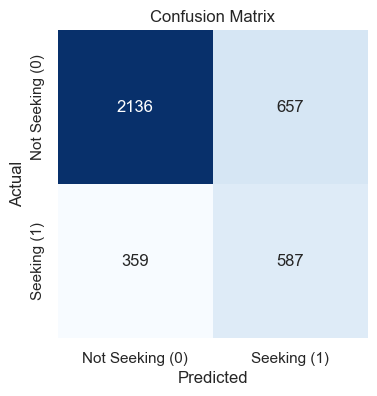

-------------------- KNearest Classifier ----------------------
Training Accuracy: 85.53%
Train Recall (weighted): 85.53%
Train F1-score (weighted): 85.43%
Cross Validation (CV=5) score: 77.65 % accuracy score

Classification Report for KNearest Classifier (Train Data):
              precision    recall  f1-score   support

         0.0     0.9289    0.7696    0.8418     11226
         1.0     0.8033    0.9411    0.8668     11226

    accuracy                         0.8553     22452
   macro avg     0.8661    0.8553    0.8543     22452
weighted avg     0.8661    0.8553    0.8543     22452

Confusion Matrix for KNearest Classifier (Train Data):
[[ 8639  2587]
 [  661 10565]]

Test Recall (weighted): 65.45%
Test F1-score (weighted): 67.51%

Classification Report for KNearest Classifier (Test Data):
              precision    recall  f1-score   support

         0.0     0.8401    0.6638    0.7416      2793
         1.0     0.3871    0.6268    0.4786       946

    accuracy               

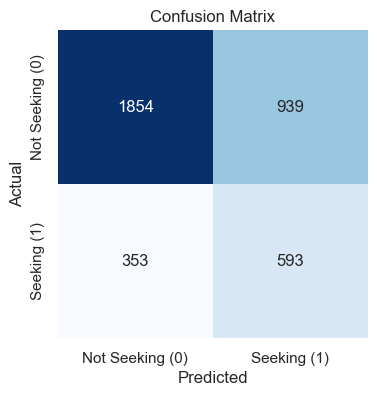

-------------------- Support Vector Classifier ----------------------
Training Accuracy: 73.26%
Train Recall (weighted): 73.26%
Train F1-score (weighted): 73.21%
Cross Validation (CV=5) score: 72.14 % accuracy score

Classification Report for Support Vector Classifier (Train Data):
              precision    recall  f1-score   support

         0.0     0.7140    0.7761    0.7437     11226
         1.0     0.7547    0.6891    0.7204     11226

    accuracy                         0.7326     22452
   macro avg     0.7344    0.7326    0.7321     22452
weighted avg     0.7344    0.7326    0.7321     22452

Confusion Matrix for Support Vector Classifier (Train Data):
[[8712 2514]
 [3490 7736]]

Test Recall (weighted): 72.13%
Test F1-score (weighted): 73.23%

Classification Report for Support Vector Classifier (Test Data):
              precision    recall  f1-score   support

         0.0     0.8501    0.7612    0.8032      2793
         1.0     0.4612    0.6036    0.5229       946

    acc

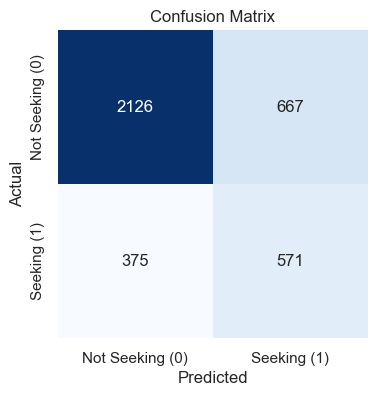

-------------------- DecisionTree Classifier ----------------------
Training Accuracy: 99.78%
Train Recall (weighted): 99.78%
Train F1-score (weighted): 99.78%
Cross Validation (CV=5) score: 78.51 % accuracy score

Classification Report for DecisionTree Classifier (Train Data):
              precision    recall  f1-score   support

         0.0     0.9958    0.9997    0.9978     11226
         1.0     0.9997    0.9958    0.9978     11226

    accuracy                         0.9978     22452
   macro avg     0.9978    0.9978    0.9978     22452
weighted avg     0.9978    0.9978    0.9978     22452

Confusion Matrix for DecisionTree Classifier (Train Data):
[[11223     3]
 [   47 11179]]

Test Recall (weighted): 71.09%
Test F1-score (weighted): 71.29%

Classification Report for DecisionTree Classifier (Test Data):
              precision    recall  f1-score   support

         0.0     0.8110    0.7991    0.8050      2793
         1.0     0.4316    0.4503    0.4408       946

    accurac

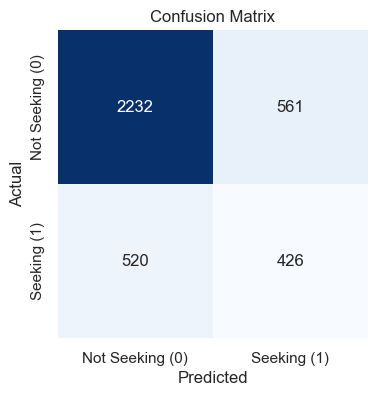

-------------------- Random Forest Classifier ----------------------
Training Accuracy: 99.77%
Train Recall (weighted): 99.77%
Train F1-score (weighted): 99.77%
Cross Validation (CV=5) score: 84.42 % accuracy score

Classification Report for Random Forest Classifier (Train Data):
              precision    recall  f1-score   support

         0.0     0.9982    0.9971    0.9977     11226
         1.0     0.9972    0.9982    0.9977     11226

    accuracy                         0.9977     22452
   macro avg     0.9977    0.9977    0.9977     22452
weighted avg     0.9977    0.9977    0.9977     22452

Confusion Matrix for Random Forest Classifier (Train Data):
[[11194    32]
 [   20 11206]]

Test Recall (weighted): 75.61%
Test F1-score (weighted): 75.19%

Classification Report for Random Forest Classifier (Test Data):
              precision    recall  f1-score   support

         0.0     0.8262    0.8528    0.8393      2793
         1.0     0.5199    0.4704    0.4939       946

    acc

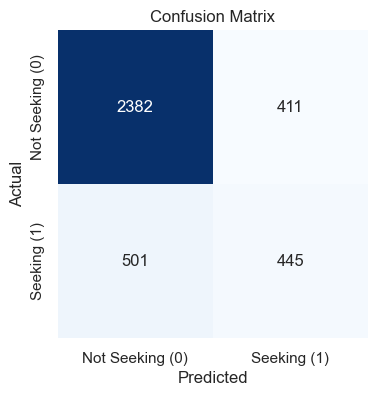

-------------------- AdaBoost Classifier ----------------------
Training Accuracy: 78.91%
Train Recall (weighted): 78.91%
Train F1-score (weighted): 78.89%
Cross Validation (CV=5) score: 78.05 % accuracy score

Classification Report for AdaBoost Classifier (Train Data):
              precision    recall  f1-score   support

         0.0     0.7723    0.8199    0.7954     11226
         1.0     0.8081    0.7582    0.7824     11226

    accuracy                         0.7891     22452
   macro avg     0.7902    0.7891    0.7889     22452
weighted avg     0.7902    0.7891    0.7889     22452

Confusion Matrix for AdaBoost Classifier (Train Data):
[[9204 2022]
 [2714 8512]]

Test Recall (weighted): 76.38%
Test F1-score (weighted): 76.88%

Classification Report for AdaBoost Classifier (Test Data):
              precision    recall  f1-score   support

         0.0     0.8593    0.8178    0.8380      2793
         1.0     0.5291    0.6047    0.5644       946

    accuracy                   

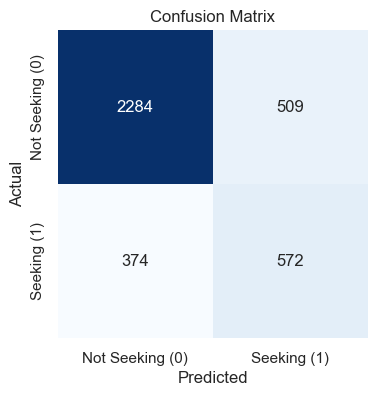

-------------------- XGBoost Classifier ----------------------
Training Accuracy: 87.60%
Train Recall (weighted): 87.6%
Train F1-score (weighted): 87.6%
Cross Validation (CV=5) score: 82.65 % accuracy score

Classification Report for XGBoost Classifier (Train Data):
              precision    recall  f1-score   support

         0.0     0.8719    0.8813    0.8766     11226
         1.0     0.8801    0.8706    0.8753     11226

    accuracy                         0.8760     22452
   macro avg     0.8760    0.8760    0.8760     22452
weighted avg     0.8760    0.8760    0.8760     22452

Confusion Matrix for XGBoost Classifier (Train Data):
[[9894 1332]
 [1453 9773]]

Test Recall (weighted): 76.17%
Test F1-score (weighted): 76.12%

Classification Report for XGBoost Classifier (Test Data):
              precision    recall  f1-score   support

         0.0     0.8392    0.8425    0.8408      2793
         1.0     0.5294    0.5233    0.5263       946

    accuracy                         

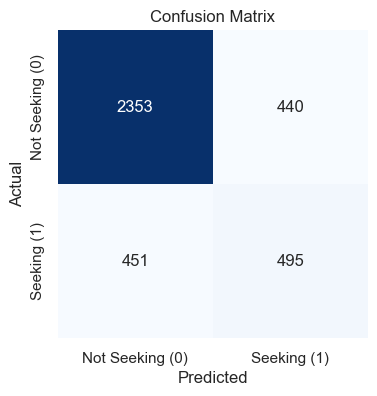

In [61]:
# Implementasikan pada beberapa algoritma klasifikasi

models = {
    "Logisitic Regression": LogisticRegression(random_state=42),
    "KNearest Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=42),
    "DecisionTree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(random_state=42)
}

# Loop through the models
for model_name, model in models.items():
    # Pelatihan model pada data train
    model.fit(X_train, y_train)

    # Prediksi pada data train
    y_pred_train = model.predict(X_train)
    
    # Hitung training accuracy
    training_accuracy = accuracy_score(y_train, y_pred_train)
    print("--------------------",model_name, "----------------------")
    print("Training Accuracy: {:.2f}%".format(training_accuracy * 100))
    
    # Recall & F1-score train data
    recall_weighted_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_weighted_train = f1_score(y_train, y_pred_train, average='weighted')
    print(f'Train Recall (weighted): {round(recall_weighted_train * 100, 2)}%')
    print(f'Train F1-score (weighted): {round(f1_weighted_train * 100, 2)}%')
    
    # Cross-validation pada data pelatihan
    training_cv_score = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross Validation (CV=5) score:", round(training_cv_score.mean() * 100, 2), "% accuracy score")
    
    # Laporan Klasifikasi pada data train
    train_report = classification_report(y_train, y_pred_train, digits=4)
    print(f'\nClassification Report for {model_name} (Train Data):\n{train_report}')
    
    # Confusion matrix pada  data train
    train_confusion = confusion_matrix(y_train, y_pred_train)
    print(f'Confusion Matrix for {model_name} (Train Data):\n{train_confusion}\n')

    # Prediksi pada test data
    y_pred_test = model.predict(X_test)
    
    # Recall & F1-score test data
    recall_weighted = recall_score(y_test, y_pred_test, average='weighted')
    f1_weighted = f1_score(y_test, y_pred_test, average='weighted')
    print(f'Test Recall (weighted): {round(recall_weighted * 100, 2)}%')
    print(f'Test F1-score (weighted): {round(f1_weighted * 100, 2)}%')
    
    # Laporan Klasifikasi pada data uji
    test_report = classification_report(y_test, y_pred_test, digits=4)
    print(f'\nClassification Report for {model_name} (Test Data):\n{test_report}')
    
    # Confusion matrix pada test data
    confusion = confusion_matrix(y_test, y_pred_test)
    print(f'Confusion Matrix for {model_name} (Test Data):\n{confusion}\n')
    plot_confusion_matrix(confusion, class_names)

# Hyperparameter Tuning using GridSearchCV(model with >75% acc)

In [62]:
from sklearn.model_selection import GridSearchCV
# Adaboost Classifier
ab_params = {'n_estimators': [25, 50, 100, 150, 300], 
             'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
             'algorithm': ['SAMME', 'SAMME.R']}
grid_ab = GridSearchCV(AdaBoostClassifier(random_state=42), ab_params, cv=5)
grid_ab.fit(X_train, y_train)
# Parameter terbaik AdaBoost
ab = grid_ab.best_estimator_

In [63]:
print(f'AdaBoost best parameter: {ab}')

AdaBoost best parameter: AdaBoostClassifier(n_estimators=300, random_state=42)


In [64]:
# XGBoost Classifier
xgb_params = {'n_estimators': [25, 50, 100, 150, 300],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'max_depth': [3, 4, 5]}
grid_xgb = GridSearchCV(XGBClassifier(random_state=42), xgb_params, cv=5)
grid_xgb.fit(X_train, y_train)
# Parameter terbaik XGBoost
xgb = grid_xgb.best_estimator_

In [70]:
print(f'XGBoost best parameter: {xgb}')

XGBoost best parameter: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [72]:
# Random Forest Classifier
rf_params = {'n_estimators': [25, 50, 100, 150, 300],
             'max_depth': [3, 4, 5],
             'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
grid_rf.fit(X_train, y_train)
# Parameter terbaik random forest
rf = grid_rf.best_estimator_

In [73]:
print(f'Random Forest best parameter: {rf}')

Random Forest best parameter: RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)


-------------------- AdaBoost Classifier ----------------------
Training Accuracy: 82.24%
Train Recall (weighted): 82.24%
Train F1-score (weighted): 82.21%
Cross Validation (CV=5) score: 81.21 % accuracy score

Classification Report for AdaBoost Classifier (Train Data):
              precision    recall  f1-score   support

         0.0     0.7969    0.8655    0.8298     11226
         1.0     0.8528    0.7794    0.8144     11226

    accuracy                         0.8224     22452
   macro avg     0.8248    0.8224    0.8221     22452
weighted avg     0.8248    0.8224    0.8221     22452

Confusion Matrix for AdaBoost Classifier (Train Data):
[[9716 1510]
 [2477 8749]]

Test Recall (weighted): 77.08%
Test F1-score (weighted): 76.7%

Classification Report for AdaBoost Classifier (Test Data):
              precision    recall  f1-score   support

         0.0     0.8361    0.8622    0.8489      2793
         1.0     0.5518    0.5011    0.5252       946

    accuracy                    

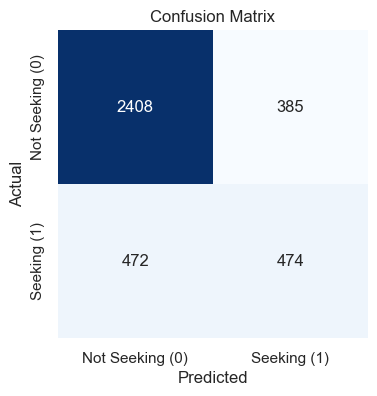

-------------------- Hasil Menggunakan full data ----------------------

Classification Report for AdaBoost Classifier (Full Data):
              precision    recall  f1-score   support

         0.0     0.8462    0.8648    0.8554     14019
         1.0     0.5658    0.5285    0.5465      4672

    accuracy                         0.7808     18691
   macro avg     0.7060    0.6966    0.7010     18691
weighted avg     0.7761    0.7808    0.7782     18691

Confusion Matrix for AdaBoost Classifier (Full Data):
[[12124  1895]
 [ 2203  2469]]



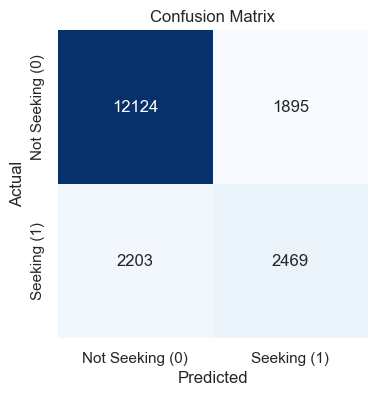

-------------------- XGBoost Classifier ----------------------
Training Accuracy: 86.34%
Train Recall (weighted): 86.34%
Train F1-score (weighted): 86.34%
Cross Validation (CV=5) score: 82.56 % accuracy score

Classification Report for XGBoost Classifier (Train Data):
              precision    recall  f1-score   support

         0.0     0.8595    0.8689    0.8641     11226
         1.0     0.8674    0.8579    0.8626     11226

    accuracy                         0.8634     22452
   macro avg     0.8634    0.8634    0.8634     22452
weighted avg     0.8634    0.8634    0.8634     22452

Confusion Matrix for XGBoost Classifier (Train Data):
[[9754 1472]
 [1595 9631]]

Test Recall (weighted): 77.0%
Test F1-score (weighted): 77.04%

Classification Report for XGBoost Classifier (Test Data):
              precision    recall  f1-score   support

         0.0     0.8473    0.8443    0.8458      2793
         1.0     0.5450    0.5507    0.5478       946

    accuracy                        

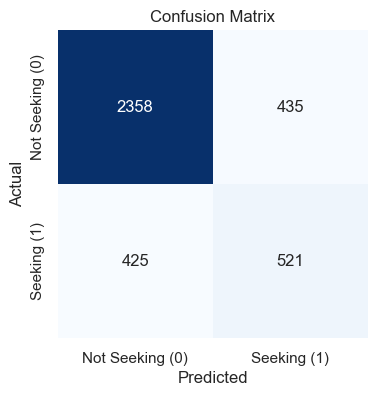

-------------------- Hasil Menggunakan full data ----------------------

Classification Report for XGBoost Classifier (Full Data):
              precision    recall  f1-score   support

         0.0     0.8689    0.8640    0.8664     14019
         1.0     0.5986    0.6087    0.6036      4672

    accuracy                         0.8002     18691
   macro avg     0.7337    0.7364    0.7350     18691
weighted avg     0.8013    0.8002    0.8007     18691

Confusion Matrix for XGBoost Classifier (Full Data):
[[12112  1907]
 [ 1828  2844]]



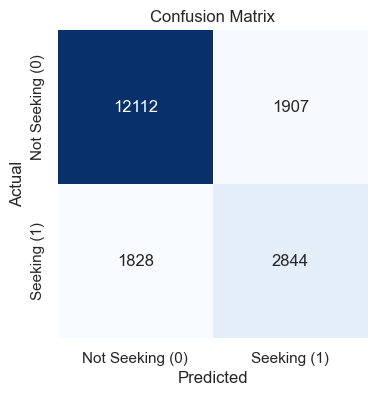

-------------------- Random Forest Classifier ----------------------
Training Accuracy: 73.70%
Train Recall (weighted): 73.7%
Train F1-score (weighted): 73.5%
Cross Validation (CV=5) score: 73.55 % accuracy score

Classification Report for Random Forest Classifier (Train Data):
              precision    recall  f1-score   support

         0.0     0.7022    0.8230    0.7578     11226
         1.0     0.7862    0.6510    0.7122     11226

    accuracy                         0.7370     22452
   macro avg     0.7442    0.7370    0.7350     22452
weighted avg     0.7442    0.7370    0.7350     22452

Confusion Matrix for Random Forest Classifier (Train Data):
[[9239 1987]
 [3918 7308]]

Test Recall (weighted): 75.93%
Test F1-score (weighted): 76.38%

Classification Report for Random Forest Classifier (Test Data):
              precision    recall  f1-score   support

         0.0     0.8541    0.8174    0.8353      2793
         1.0     0.5216    0.5877    0.5527       946

    accuracy 

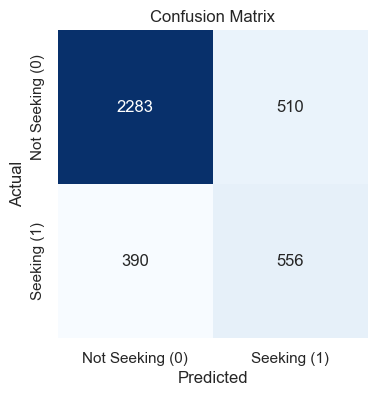

-------------------- Hasil Menggunakan full data ----------------------

Classification Report for Random Forest Classifier (Full Data):
              precision    recall  f1-score   support

         0.0     0.8603    0.8219    0.8407     14019
         1.0     0.5287    0.5995    0.5619      4672

    accuracy                         0.7663     18691
   macro avg     0.6945    0.7107    0.7013     18691
weighted avg     0.7774    0.7663    0.7710     18691

Confusion Matrix for Random Forest Classifier (Full Data):
[[11522  2497]
 [ 1871  2801]]



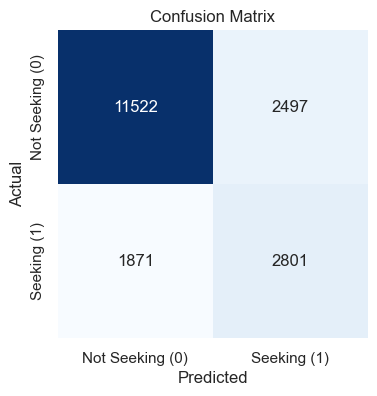

In [74]:
# hyperparameter tuned model

models_tuned = {
    "AdaBoost Classifier": ab,
    "XGBoost Classifier": xgb,
    "Random Forest Classifier": rf
}

# Loop through the models
for model_name, model in models_tuned.items():
    # Pelatihan model pada data train
    model.fit(X_train, y_train)

    # Prediksi pada data train
    y_pred_train = model.predict(X_train)
    
    # Hitung training accuracy
    training_accuracy = accuracy_score(y_train, y_pred_train)
    print("--------------------",model_name, "----------------------")
    print("Training Accuracy: {:.2f}%".format(training_accuracy * 100))
    
    # Recall & F1-score train data
    recall_weighted_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_weighted_train = f1_score(y_train, y_pred_train, average='weighted')
    print(f'Train Recall (weighted): {round(recall_weighted_train * 100, 2)}%')
    print(f'Train F1-score (weighted): {round(f1_weighted_train * 100, 2)}%')
    
    # Cross-validation pada data pelatihan
    training_cv_score = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross Validation (CV=5) score:", round(training_cv_score.mean() * 100, 2), "% accuracy score")
    
    # Laporan Klasifikasi pada data train
    train_report = classification_report(y_train, y_pred_train, digits=4)
    print(f'\nClassification Report for {model_name} (Train Data):\n{train_report}')
    
    # Confusion matrix pada  data train
    train_confusion = confusion_matrix(y_train, y_pred_train)
    print(f'Confusion Matrix for {model_name} (Train Data):\n{train_confusion}\n')

    # Prediksi pada test data
    y_pred_test = model.predict(X_test)
    
    # Recall & F1-score
    recall_weighted = recall_score(y_test, y_pred_test, average='weighted')
    f1_weighted = f1_score(y_test, y_pred_test, average='weighted')
    print(f'Test Recall (weighted): {round(recall_weighted * 100, 2)}%')
    print(f'Test F1-score (weighted): {round(f1_weighted * 100, 2)}%')
    
    # Laporan Klasifikasi pada data uji
    test_report = classification_report(y_test, y_pred_test, digits=4)
    print(f'\nClassification Report for {model_name} (Test Data):\n{test_report}')
    
    # Confusion matrix pada test data
    confusion = confusion_matrix(y_test, y_pred_test)
    print(f'Confusion Matrix for {model_name} (Test Data):\n{confusion}\n')
    plot_confusion_matrix(confusion, class_names)
    
    print("-------------------- Hasil Menggunakan full data ----------------------")
    y_pred_full = model.predict(X_ss)
    full_report = classification_report(y, y_pred_full, digits=4)
    print(f'\nClassification Report for {model_name} (Full Data):\n{full_report}')

    full_confusion = confusion_matrix(y, y_pred_full)
    print(f'Confusion Matrix for {model_name} (Full Data):\n{full_confusion}\n')
    plot_confusion_matrix(full_confusion, class_names)

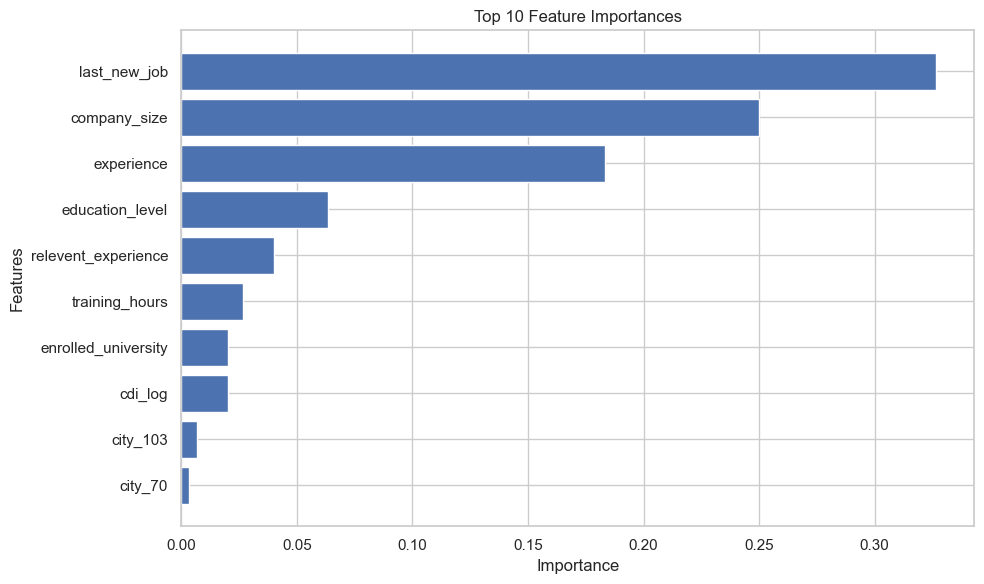

In [75]:
data_features = final_df.columns.drop('target').tolist()
Importances = pd.DataFrame(data_features, columns=['Col'])
Importances['Importance'] = ab.feature_importances_

Importances_sorted = Importances.sort_values(by='Importance', ascending=False)

# Display only the top 10 rows
top_10_importances = Importances_sorted.head(10).sort_values(by='Importance', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_importances['Col'], top_10_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.tight_layout()

# Show the plot
plt.show()

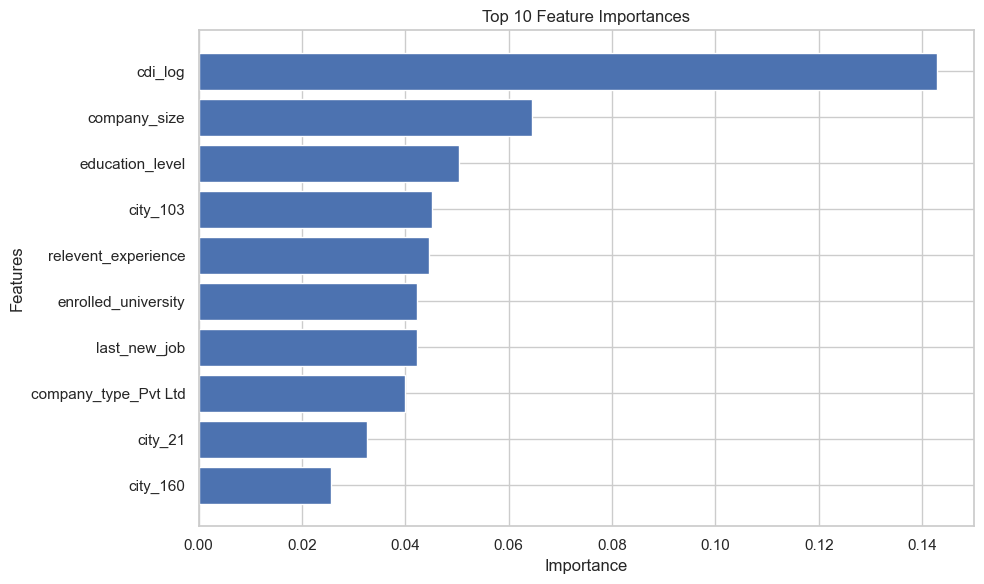

In [76]:
data_features = final_df.columns.drop('target').tolist()
Importances = pd.DataFrame(data_features, columns=['Col'])
Importances['Importance'] = xgb.feature_importances_

Importances_sorted = Importances.sort_values(by='Importance', ascending=False)

# Display only the top 10 rows
top_10_importances = Importances_sorted.head(10).sort_values(by='Importance', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_importances['Col'], top_10_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.tight_layout()

# Show the plot
plt.show()

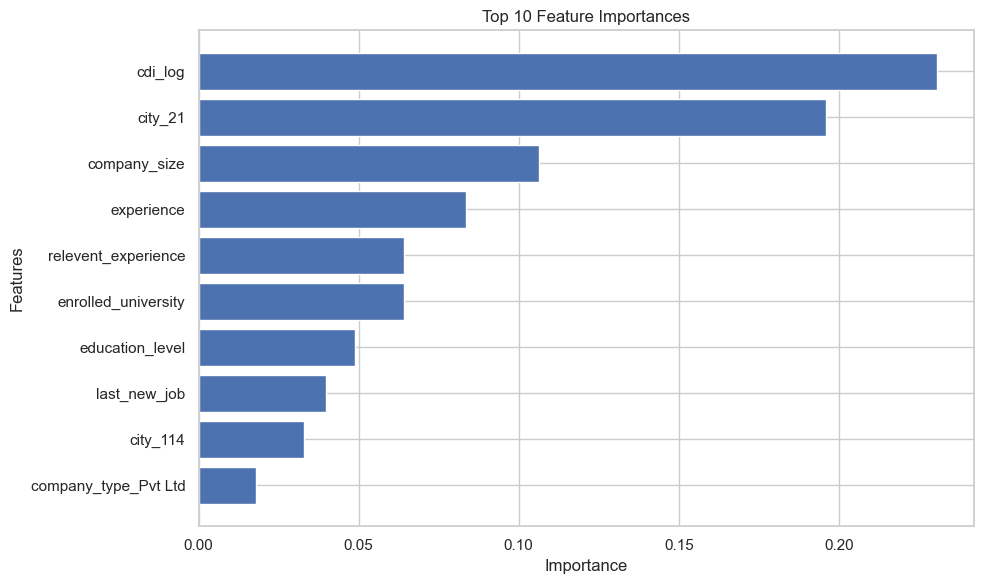

In [77]:
data_features = final_df.columns.drop('target').tolist()
Importances = pd.DataFrame(data_features, columns=['Col'])
Importances['Importance'] = rf.feature_importances_

Importances_sorted = Importances.sort_values(by='Importance', ascending=False)

# Display only the top 10 rows
top_10_importances = Importances_sorted.head(10).sort_values(by='Importance', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_importances['Col'], top_10_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.tight_layout()

# Show the plot
plt.show()